In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Data preparation

In [3]:
historicalsale=pd.read_csv("E:\工作\百威\(Replace)Historical Sales Volume 2016.1-2019.11.csv")
masterdata=pd.read_csv("E:\工作\百威\(Replace)Product Master Data.csv")
commercialplanning=pd.read_csv("E:\工作\百威\(Replace)Commercial Planning.csv")

In [4]:
saleseries=pd.read_csv("C:/Users/mings/BUD/rearranged_sale.csv")
calendar=pd.read_csv("E:\工作\百威\calendar.csv")

In [5]:
historicalsale['Date']=historicalsale['Date'].apply(lambda x: datetime.strptime(x,'%Y/%m/%d'))

In [6]:
historicalsale.set_index('Date',inplace=True)

In [7]:
historicalsale['Day']=historicalsale.index.map(lambda x: x.day)

In [8]:
historicalsale

,Year,Month,YM,SalesRegion,SKU Code,VolumeHL,Day
Date,,,,,,,
2016-01-02,2016,1,201601,Heilongjiang,1,2020,2
2016-01-02,2016,1,201601,Heilongjiang,4,79,2
2016-01-02,2016,1,201601,Heilongjiang,9,138,2
2016-01-02,2016,1,201601,Heilongjiang,11,32,2
2016-01-02,2016,1,201601,Heilongjiang,13,95,2
...,...,...,...,...,...,...,...
2019-11-30,2019,11,201911,Jilin,63,1056,30
2019-11-30,2019,11,201911,Jilin,64,1831,30
2019-11-30,2019,11,201911,Jilin,66,43,30


In [9]:
# create new historical sale which will contain all the  zero
from datetime import datetime
saleseries['Unnamed: 0']=saleseries['Unnamed: 0'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
saleseries

,Unnamed: 0,Heilongjiang_1,Heilongjiang_4,Heilongjiang_9,Heilongjiang_11,Heilongjiang_13,Heilongjiang_14,Heilongjiang_15,Heilongjiang_16,Heilongjiang_17,...,Jilin_64,Jilin_61,Jilin_66,Jilin_68,Jilin_65,Jilin_69,Jilin_62,Jilin_63,Jilin_45,Jilin_2
0,2016-01-02,2020.0,79.0,138.0,32.0,95.0,60.0,484.0,1771.0,161.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-03,1544.0,158.0,NaN,NaN,48.0,989.0,NaN,2800.0,127.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-04,1992.0,32.0,69.0,NaN,158.0,595.0,230.0,1784.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-05,2592.0,NaN,NaN,NaN,285.0,535.0,NaN,2085.0,115.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-06,2214.0,285.0,121.0,48.0,206.0,922.0,132.0,2372.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,2019-11-26,890.0,200.0,NaN,NaN,NaN,267.0,230.0,321.0,323.0,...,468.0,768.0,130.0,2125.0,NaN,380.0,160.0,869.0,NaN,NaN
1425,2019-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,795.0,...,775.0,829.0,60.0,2048.0,NaN,1011.0,468.0,120.0,NaN,NaN
1426,2019-11-28,NaN,177.0,NaN,NaN,111.0,NaN,69.0,722.0,536.0,...,1657.0,1196.0,NaN,1244.0,NaN,60.0,615.0,347.0,NaN,NaN
1427,2019-11-29,613.0,255.0,NaN,NaN,NaN,NaN,NaN,180.0,323.0,...,575.0,1296.0,NaN,2117.0,NaN,NaN,715.0,187.0,NaN,NaN


In [10]:
import re
def seriestrans(saleseries):
    niters=saleseries.shape[1]
    clen=saleseries.shape[0]
    counts=0
    for i in range(1,niters):
        region=re.match('(.*)_(.*)',saleseries.columns[i]).group(1)
        sku=re.match('(.*)_(.*)',saleseries.columns[i]).group(2)
        for j in range(clen):
            hissaleall.loc[counts,'Year']=saleseries.iloc[j,0].year
            hissaleall.loc[counts,'Month']=saleseries.iloc[j,0].month
            hissaleall.loc[counts,'Day']=saleseries.iloc[j,0].day
            hissaleall.loc[counts,'Date']=saleseries.iloc[j,0]
            hissaleall.loc[counts,'SalesRegion']=region
            hissaleall.loc[counts,'SKU Code']=sku
            hissaleall.loc[counts,'VolumeHL']=saleseries.iloc[j,i]
            counts+=1

In [11]:
hissaleall=pd.DataFrame(columns=['Date','Year','Month','Day','SalesRegion','SKU Code','VolumeHL'],index=range(130000))

In [12]:
seriestrans(saleseries)

In [13]:
hissaleall

,Date,Year,Month,Day,SalesRegion,SKU Code,VolumeHL
0,2016-01-02 00:00:00,2016,1,2,Heilongjiang,1,2020
1,2016-01-03 00:00:00,2016,1,3,Heilongjiang,1,1544
2,2016-01-04 00:00:00,2016,1,4,Heilongjiang,1,1992
3,2016-01-05 00:00:00,2016,1,5,Heilongjiang,1,2592
4,2016-01-06 00:00:00,2016,1,6,Heilongjiang,1,2214
...,...,...,...,...,...,...,...
129995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129997,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129998,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
hissaleall.dropna(how='all',inplace=True)

In [15]:
hissaleall.set_index('Date',inplace=True)

In [16]:
hissaleall.fillna(0,inplace=True)

In [17]:
hissaleall['SKU Code']=hissaleall['SKU Code'].astype(int)

In [18]:
hissaleall['SalesRegion']=hissaleall['SalesRegion'].astype(str)

In [19]:
hissaleall

,Year,Month,Day,SalesRegion,SKU Code,VolumeHL
Date,,,,,,
2016-01-02,2016,1,2,Heilongjiang,1,2020.0
2016-01-03,2016,1,3,Heilongjiang,1,1544.0
2016-01-04,2016,1,4,Heilongjiang,1,1992.0
2016-01-05,2016,1,5,Heilongjiang,1,2592.0
2016-01-06,2016,1,6,Heilongjiang,1,2214.0
...,...,...,...,...,...,...
2019-11-26,2019,11,26,Jilin,2,0.0
2019-11-27,2019,11,27,Jilin,2,0.0
2019-11-28,2019,11,28,Jilin,2,0.0


In [24]:
#  a function for finding coresponding historical data

# 后面可能需要考虑动态历史数据寻找
def aggsales(tarset):
    tarcol=[ 'Year', 'Month','SalesRegion', 'SKU Code', 'VolumeHL']
    tarset=tarset.copy()
    tarhist=pd.DataFrame(columns=tarcol,index=range(10000))
    targrouped=tarset.groupby(['Year','Month','SalesRegion','SKU Code'])
    count=0
    hskuc=list(hissaleall[hissaleall['SalesRegion']=='Heilongjiang']['SKU Code'].unique())
    jskuc=list(hissaleall[hissaleall['SalesRegion']=='Jilin']['SKU Code'].unique())
    for y in [2016,2017,2018,2019]:
        for m in range(1,13):
            for i in hskuc:
                try:
                    tseries=targrouped.get_group((y,m,'Heilongjiang',i))['VolumeHL'].sum()
                    tarhist.loc[count,'Year']=y
                    tarhist.loc[count,'Month']=m
                    tarhist.loc[count,'SalesRegion']='Heilongjiang'
                    tarhist.loc[count,'SKU Code']=i
                    tarhist.loc[count,'VolumeHL']=tseries
                except:
                    print(y," ",m," ",i)
                count=count+1
    for y in [2016,2017,2018,2019]:
        for m in range(1,13):
            for i in jskuc:
                try:
                    tseries=targrouped.get_group((y,m,'Jilin',i))['VolumeHL'].sum()
                    tarhist.loc[count,'Year']=y
                    tarhist.loc[count,'Month']=m
                    tarhist.loc[count,'SalesRegion']='Jilin'
                    tarhist.loc[count,'SKU Code']=i
                    tarhist.loc[count,'VolumeHL']=tseries
                except:
                    print(y," ",m," ",i)
                count=count+1
#     tarhist['Month']=tarhist['Month'].apply(lambda x: x-1 if x>1 else x+11)
#     tarhist.columns=tarhist.columns.map(lambda x: x+'_hist' if x in tarcol else x)
    return tarhist

In [25]:
agghissales=aggsales(hissaleall)

2019   12   1
2019   12   4
2019   12   9
2019   12   11
2019   12   13
2019   12   14
2019   12   15
2019   12   16
2019   12   17
2019   12   21
2019   12   22
2019   12   24
2019   12   27
2019   12   31
2019   12   32
2019   12   33
2019   12   36
2019   12   39
2019   12   40
2019   12   41
2019   12   43
2019   12   5
2019   12   19
2019   12   29
2019   12   12
2019   12   8
2019   12   23
2019   12   34
2019   12   10
2019   12   37
2019   12   30
2019   12   3
2019   12   45
2019   12   28
2019   12   67
2019   12   38
2019   12   1
2019   12   4
2019   12   13
2019   12   16
2019   12   19
2019   12   20
2019   12   22
2019   12   25
2019   12   27
2019   12   31
2019   12   26
2019   12   44
2019   12   46
2019   12   47
2019   12   48
2019   12   49
2019   12   50
2019   12   51
2019   12   52
2019   12   53
2019   12   55
2019   12   56
2019   12   57
2019   12   60
2019   12   8
2019   12   11
2019   12   54
2019   12   59
2019   12   5
2019   12   6
2019   12   9
2019   

In [26]:
agghissales=agghissales.dropna(how='all')
agghissales

,Year,Month,SalesRegion,SKU Code,VolumeHL
0,2016,1,Heilongjiang,1,60468
1,2016,1,Heilongjiang,4,2965
2,2016,1,Heilongjiang,9,4882
3,2016,1,Heilongjiang,11,350
4,2016,1,Heilongjiang,13,4041
...,...,...,...,...,...
4167,2019,11,Jilin,69,4880
4168,2019,11,Jilin,62,6569
4169,2019,11,Jilin,63,5768
4170,2019,11,Jilin,45,0


In [27]:
# load temperature
Htem=pd.read_csv("E:\工作\百威\Data\HWeather_t.csv")
Jtem=pd.read_csv("E:\工作\百威\Data\JWeather_t.csv")
#Htem.info()
Htem

,Date,Temp_max,Temp_min
0,2016-01-01,-5℃,-20℃
1,2016-01-02,-13℃,-23℃
2,2016-01-03,-12℃,-25℃
3,2016-01-04,-12℃,-21℃
4,2016-01-05,-11℃,-18℃
...,...,...,...
1485,2020-01-27,-4℃,-15℃
1486,2020-01-28,-10℃,-19℃
1487,2020-01-29,-8℃,-22℃
1488,2020-01-30,-11℃,-24℃


In [28]:
import re

In [29]:
Htem['Temp_max']=Htem['Temp_max'].map(lambda x: re.match('(.*)℃',x)[1])
Htem['Temp_max']=Htem['Temp_max'].astype(int)
Htem['Temp_min']=Htem['Temp_min'].map(lambda x: re.match('(.*)℃',x)[1])
Htem['Temp_min']=Htem['Temp_min'].astype(int)

In [30]:
Htem['Date']=Htem['Date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [31]:
Htem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1490 non-null   datetime64[ns]
 1   Temp_max  1490 non-null   int32         
 2   Temp_min  1490 non-null   int32         
dtypes: datetime64[ns](1), int32(2)
memory usage: 23.4 KB


In [32]:
Jtem['Temp_min']=Jtem['Temp_min'].map(lambda x: re.match('(.*)℃',x)[1])
Jtem['Temp_max']=Jtem['Temp_max'].map(lambda x: re.match('(.*)℃',x)[1])
Jtem['Temp_max']=Jtem['Temp_max'].astype(int)
Jtem['Temp_min']=Jtem['Temp_min'].astype(int)
Jtem['Date']=Jtem['Date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [33]:
Htem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1490 non-null   datetime64[ns]
 1   Temp_max  1490 non-null   int32         
 2   Temp_min  1490 non-null   int32         
dtypes: datetime64[ns](1), int32(2)
memory usage: 23.4 KB


In [34]:
Htem['SalesRegion']='Heilongjiang'
Jtem['SalesRegion']='Jilin'

In [35]:
Twotemps=Htem.append(Jtem)
Twotemps

,Date,Temp_max,Temp_min,SalesRegion
0,2016-01-01,-5,-20,Heilongjiang
1,2016-01-02,-13,-23,Heilongjiang
2,2016-01-03,-12,-25,Heilongjiang
3,2016-01-04,-12,-21,Heilongjiang
4,2016-01-05,-11,-18,Heilongjiang
...,...,...,...,...
1485,2020-01-27,1,-11,Jilin
1486,2020-01-28,-4,-15,Jilin
1487,2020-01-29,-9,-20,Jilin
1488,2020-01-30,-9,-21,Jilin


In [36]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551 entries, 0 to 1550
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1551 non-null   object 
 1   weekday       1551 non-null   object 
 2   wday          168 non-null    float64
 3   month         170 non-null    float64
 4   year          1551 non-null   int64  
 5   event_name_1  111 non-null    object 
 6   event_type_1  111 non-null    object 
 7   holiday       118 non-null    float64
 8   work          31 non-null     float64
 9   event_name_2  68 non-null     object 
 10  event_type_2  68 non-null     object 
dtypes: float64(4), int64(1), object(6)
memory usage: 133.4+ KB


In [37]:
calendar['date']=calendar['date'].astype(str)
calendar['Date']=calendar['date'].apply(lambda x: datetime.strptime(x,'%Y/%m/%d'))

In [38]:
calendar['Date'].map(lambda x: x.year)

0       2016
1       2016
2       2016
3       2016
4       2016
        ... 
1546    2020
1547    2020
1548    2020
1549    2020
1550    2020
Name: Date, Length: 1551, dtype: int64

In [39]:
def aggevent(markerlist,temdf):
    temdf=temdf.copy()
    for i in range(len(markerlist)):
        tarevent=markerlist[i]
        #print(1)
        if tarevent in ['National','Cultural']:
            #print(3)
            for m in range(len(temdf)):
                #print(temdf.loc[m,'event1'])
                if temdf.loc[m,'event_type_1']==tarevent:
                    temdf.loc[m,tarevent]=1
                    #print(2)
        else:
            for m in range(len(temdf)):
                if temdf.loc[m,'event_type_2']==tarevent:
                    temdf.loc[m,tarevent]=1
    temdf['Year']=temdf['Date'].map(lambda x: x.year)
    temdf['Month']=temdf['Date'].map(lambda x: x.month)
    tarcol=[ 'Year', 'Month']
    tarcol.extend(markerlist)
    tarset=temdf[tarcol]
    tarhist=pd.DataFrame(columns=tarcol,index=range(100))
    targrouped=tarset.groupby(['Year','Month'])
    count=0
    for y in [2016,2017,2018,2019]:
        for m in range(1,13):
            try:
                tseries=targrouped.get_group((y,m)).sum()
                #print(tseries)
                tarhist.loc[count,'Year']=y
                tarhist.loc[count,'Month']=m
                tarhist.loc[count,'National']=tseries['National']
                tarhist.loc[count,'Cultural']=tseries['Cultural']
                tarhist.loc[count,'Sporting']=tseries['Sporting']
            except:
                print(y," ",m," ")
            count=count+1
    tarhist[markerlist]=tarhist[markerlist].shift(periods=-1)
    return tarhist

In [40]:
calendar['event_type_2'].value_counts()

Sporting    65
COVID19      3
Name: event_type_2, dtype: int64

In [41]:
calendar[calendar['event_type_2']=='COVID19']['event_type_2']=np.nan

C:\Users\mings\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
calendar['event_type_2'].value_counts()

Sporting    65
COVID19      3
Name: event_type_2, dtype: int64

In [43]:
calendar['event_type_1'].value_counts()

National    64
Cultural    47
Name: event_type_1, dtype: int64

In [44]:
calendardroped=calendar.drop(columns=['event_name_1','holiday','work','event_name_1','weekday','wday','month','year','event_name_2'])

In [45]:
calendardroped['National']=0
calendardroped['Cultural']=0
calendardroped['Sporting']=0

In [46]:
calendardroped

,date,event_type_1,event_type_2,Date,National,Cultural,Sporting
0,2016/1/2,NaN,NaN,2016-01-02,0,0,0
1,2016/1/3,NaN,NaN,2016-01-03,0,0,0
2,2016/1/4,NaN,NaN,2016-01-04,0,0,0
3,2016/1/5,NaN,NaN,2016-01-05,0,0,0
4,2016/1/6,NaN,NaN,2016-01-06,0,0,0
...,...,...,...,...,...,...,...
1546,2020/3/27,NaN,NaN,2020-03-27,0,0,0
1547,2020/3/28,NaN,NaN,2020-03-28,0,0,0
1548,2020/3/29,NaN,NaN,2020-03-29,0,0,0
1549,2020/3/30,NaN,NaN,2020-03-30,0,0,0


In [47]:
aggevents=aggevent(['National','Cultural','Sporting'],calendardroped)

In [48]:
aggevents=aggevents.dropna(how='all')

In [49]:
aggevents

,Year,Month,National,Cultural,Sporting
0,2016,1,3,2,1
1,2016,2,1,0,0
2,2016,3,1,1,1
3,2016,4,2,1,1
4,2016,5,2,1,3
5,2016,6,1,0,1
6,2016,7,1,2,17
7,2016,8,2,0,0
8,2016,9,1,1,0
9,2016,10,0,1,0


In [50]:
HECPI=pd.read_csv("E:\工作\百威\Data\HCPI_E_t.csv")
JECPI=pd.read_csv("E:\工作\百威\Data\JCPI_E_t.csv")

In [51]:
# a function to formalize  CPI data's format
def transcpi(tarset,region):
    try:
        tarset['Date']=tarset['Date'].apply(lambda x: datetime.strptime(x,'%Y/%m/%d'))
    except:
        print('Already Datetime')
    tarset['Year']=tarset['Date'].map(lambda x: x.year)
    tarset['Month']=tarset['Date'].map(lambda x: x.month)
    tarset['SalesRegion']=region
    tarset.drop(columns=['Date'],inplace=True)
    return tarset

In [52]:
HECPIT=transcpi(HECPI,'Heilongjiang')
JECPIT=transcpi(JECPI,'Jilin')
CPIT=HECPIT.append(JECPIT)

In [53]:
CPITcols=[]
for x in CPIT.columns:
    if x not in ['Year','Month', 'SalesRegion']:
        CPITcols.append(x)
CPIT[CPITcols]=CPIT[CPITcols]-100
CPIT

,CPI_rice,CPI_meat,CPI_egg,CPI_fish,CPI_veg,CPI_fruit,Year,Month,SalesRegion
0,1.5,17.1,-4.3,2.5,15.6,-4.9,2016,1,Heilongjiang
1,0.9,21.4,-3.5,2.9,17.3,-5.9,2016,2,Heilongjiang
2,0.5,21.1,-3.6,0.9,25.3,-9.3,2016,3,Heilongjiang
3,0.2,23.4,-0.3,-0.2,14.4,-5.2,2016,4,Heilongjiang
4,0.7,22.1,2.3,0.9,-1.0,-6.6,2016,5,Heilongjiang
...,...,...,...,...,...,...,...,...,...
48,0.2,88.5,0.0,4.9,28.1,0.4,2020,1,Jilin
49,0.2,81.2,-0.3,6.1,14.5,-3.1,2020,2,Jilin
50,0.0,73.9,-0.7,4.4,5.6,-3.5,2020,3,Jilin
51,0.5,60.1,-4.1,5.4,1.9,-7.4,2020,4,Jilin


In [54]:
# a function for exponential smoothing and shift
def doews(tarset, alpha, periods):
    tarset=tarset.copy()
    for x in tarset.columns:
        if x not in ['Year','Month', 'SalesRegion','Date']:
            tarset[x+'_es_'+str(periods)]=tarset[x].ewm(alpha=alpha, adjust=False).mean()
            tarset[x+'_es_'+str(periods)]=tarset[x+'_es_'+str(periods)].shift(periods=periods)
            tarset=tarset.drop(columns=x)
    return tarset

In [55]:
CPI_es_1=doews(CPIT, 0.7,1)
CPI_es_1

,Year,Month,SalesRegion,CPI_rice_es_1,CPI_meat_es_1,CPI_egg_es_1,CPI_fish_es_1,CPI_veg_es_1,CPI_fruit_es_1
0,2016,1,Heilongjiang,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,2,Heilongjiang,1.500000,17.100000,-4.300000,2.500000,15.600000,-4.900000
2,2016,3,Heilongjiang,1.080000,20.110000,-3.740000,2.780000,16.790000,-5.600000
3,2016,4,Heilongjiang,0.674000,20.803000,-3.642000,1.464000,22.747000,-8.190000
4,2016,5,Heilongjiang,0.342200,22.620900,-1.302600,0.299200,16.904100,-6.097000
...,...,...,...,...,...,...,...,...,...
48,2020,1,Jilin,0.340782,74.100404,5.164402,2.135567,14.234612,-2.172754
49,2020,2,Jilin,0.242234,84.180121,1.549321,4.070670,23.940383,-0.371826
50,2020,3,Jilin,0.212670,82.094036,0.254796,5.491201,17.332115,-2.281548
51,2020,4,Jilin,0.063801,76.358211,-0.413561,4.727360,9.119635,-3.134464


In [56]:
CPI_es_1_tf=CPI_es_1.copy()
CPI_es_1_tf.iloc[0,3:]=CPI_es_1_tf.iloc[11,3:]+0.03
CPI_es_1_tf

,Year,Month,SalesRegion,CPI_rice_es_1,CPI_meat_es_1,CPI_egg_es_1,CPI_fish_es_1,CPI_veg_es_1,CPI_fruit_es_1
0,2016,1,Heilongjiang,1.323762,2.396451,-2.637804,3.267974,5.098857,0.691192
1,2016,2,Heilongjiang,1.500000,17.100000,-4.300000,2.500000,15.600000,-4.900000
2,2016,3,Heilongjiang,1.080000,20.110000,-3.740000,2.780000,16.790000,-5.600000
3,2016,4,Heilongjiang,0.674000,20.803000,-3.642000,1.464000,22.747000,-8.190000
4,2016,5,Heilongjiang,0.342200,22.620900,-1.302600,0.299200,16.904100,-6.097000
...,...,...,...,...,...,...,...,...,...
48,2020,1,Jilin,0.340782,74.100404,5.164402,2.135567,14.234612,-2.172754
49,2020,2,Jilin,0.242234,84.180121,1.549321,4.070670,23.940383,-0.371826
50,2020,3,Jilin,0.212670,82.094036,0.254796,5.491201,17.332115,-2.281548
51,2020,4,Jilin,0.063801,76.358211,-0.413561,4.727360,9.119635,-3.134464


In [57]:
#  a function for finding coresponding historical data

# 后面可能需要考虑动态历史数据寻找
def findhistory(tarset):
    tarcol=[]
    for x in tarset.columns:
        if x not in ['Year','Month', 'SalesRegion','Date']:
            tarcol.append(x)
#     print(tarcol)
    tarcolfull=tarcol.copy().extend(['Month', 'SalesRegion'])
#     print(tarcol)
    tarset=tarset.copy()
    tarhist=pd.DataFrame(columns=tarcolfull,index=range(24))
    if 'Month' in tarset.columns:
        targrouped=tarset.groupby(['Month','SalesRegion'])
    elif 'Date' in tarset.columns:
        tarset['Month']=tarset['Date'].apply(lambda x: x.month)
        targrouped=tarset.groupby(['Month','SalesRegion'])
    else:
        print('Dont have proper timestamp')
    count=0
    for m in range(1,13):
        for n in ['Heilongjiang','Jilin']:
            tseries=targrouped.get_group((m,n)).mean()
            tarhist.loc[count,'Month']=m
            tarhist.loc[count,'SalesRegion']=n
            for x in tarcol:
#                 print(x)
                tarhist.loc[count,x]=tseries[x]
            count=count+1
#     mapdict={1:2,
#              2:3,
#              3:4,
#              4:5,
#              5:6,
#              6:7,
#              7:8,
#              8:9,
#              9:10,
#             10:11,
#             11:12,
#             12:1}
    tarhist['Month']=tarhist['Month'].apply(lambda x: x-1 if x>1 else x+11)
    tarhist.columns=tarhist.columns.map(lambda x: x+'_hist' if x in tarcol else x)
    return tarhist

In [58]:
CPIT_hisdata=findhistory(CPIT)

In [59]:
CPIT_hisdata

,Month,SalesRegion,CPI_rice_hist,CPI_meat_hist,CPI_egg_hist,CPI_fish_hist,CPI_veg_hist,CPI_fruit_hist
0,12.0,Heilongjiang,1.300,19.360,-0.800,2.340,7.780,1.900
1,12.0,Jilin,0.600,18.140,-0.280,2.700,9.000,3.300
2,1.0,Heilongjiang,1.220,19.920,-0.680,2.160,5.160,1.700
3,1.0,Jilin,0.600,17.860,-0.920,2.780,5.800,2.020
4,2.0,Heilongjiang,1.160,18.360,-1.000,1.960,5.660,1.580
5,2.0,Jilin,0.580,17.040,-1.440,1.900,5.300,1.160
6,3.0,Heilongjiang,1.180,15.860,-0.820,1.660,2.960,1.560
7,3.0,Jilin,0.640,15.620,-0.740,1.860,2.860,2.160
8,4.0,Heilongjiang,1.220,13.380,-1.080,1.820,0.720,2.140
9,4.0,Jilin,0.700,13.840,-0.760,2.560,2.520,2.500


In [60]:
Temp_hisdata=findhistory(Twotemps)

In [61]:
Temp_hisdata

,Month,SalesRegion,Temp_max_hist,Temp_min_hist
0,12.0,Heilongjiang,-11.612903,-22.658065
1,12.0,Jilin,-8.264516,-17.767742
2,1.0,Heilongjiang,-6.088496,-17.752212
3,1.0,Jilin,-3.982301,-13.920354
4,2.0,Heilongjiang,4.967742,-6.895161
5,2.0,Jilin,5.846774,-4.298387
6,3.0,Heilongjiang,14.358333,2.108333
7,3.0,Jilin,15.008333,3.833333
8,4.0,Heilongjiang,21.911290,10.104839
9,4.0,Jilin,22.572581,10.870968


In [62]:
sales=agghissales.copy()
sales.columns

Index(['Year', 'Month', 'SalesRegion', 'SKU Code', 'VolumeHL'], dtype='object')

In [63]:
sales['SKU Code'].unique().max()

69

In [64]:
# 后面可能需要考虑动态历史数据寻找
def salehistory(tarset,flag):
    if flag==1:
        tarcolfull=['Month', 'SalesRegion', 'SKU Code', 'VolumeHL_m','VolumeHL_mstd']
    #     print(tarcol)
        tarset=tarset.copy()
        tarhist=pd.DataFrame(columns=tarcolfull,index=range(1200))
        targrouped=tarset.groupby(['Month','SalesRegion','SKU Code'])
        count=0
        for m in range(1,13):
            for n in ['Heilongjiang','Jilin']:
                for i in range(1,70):
                    try:
                        tseries=targrouped.get_group((m,n,i)).mean()
                        tarhist.loc[count,'Month']=m
                        tarhist.loc[count,'SalesRegion']=n
                        tarhist.loc[count,'SKU Code']=i
                        tarhist.loc[count,'VolumeHL_m']=tseries['VolumeHL']
                        tstd=targrouped.get_group((m,n,i)).std()
                        #print(tstd.iloc[3])
                        tarhist.loc[count,'VolumeHL_mstd']=tstd.iloc[3]
                        count=count+1
                    except:
                        print(m," ",n," ",i)
    else:
        tarcolfull=['Year','SalesRegion', 'SKU Code', 'VolumeHL_y','VolumeHL_ystd']
    #     print(tarcol)
        tarset=tarset.copy()
        tarhist=pd.DataFrame(columns=tarcolfull,index=range(1200))
        targrouped=tarset.groupby(['Year','SalesRegion','SKU Code'])
        count=0
        for m in [2016,2017,2018,2019]:
            for n in ['Heilongjiang','Jilin']:
                for i in range(1,70):
                    try:
                        tseries=targrouped.get_group((m,n,i)).mean()
                        tarhist.loc[count,'Year']=m
                        tarhist.loc[count,'SalesRegion']=n
                        tarhist.loc[count,'SKU Code']=i
                        tarhist.loc[count,'VolumeHL_y']=tseries['VolumeHL']
                        tstd=targrouped.get_group((m,n,i)).std()
                        #print(tstd)
                        tarhist.loc[count,'VolumeHL_ystd']=tstd.iloc[3]
                        count=count+1
                    except:
                        print(m," ",n," ",i)
#     mapdict={1:2,
#              2:3,
#              3:4,
#              4:5,
#              5:6,
#              6:7,
#              7:8,
#              8:9,
#              9:10,
#             10:11,
#             11:12,
#             12:1}
    return tarhist

In [65]:
volumehis_m=salehistory(agghissales,1)
volumehis_m=volumehis_m.dropna(how='all')

1   Heilongjiang   2
1   Heilongjiang   6
1   Heilongjiang   7
1   Heilongjiang   18
1   Heilongjiang   20
1   Heilongjiang   25
1   Heilongjiang   26
1   Heilongjiang   35
1   Heilongjiang   42
1   Heilongjiang   44
1   Heilongjiang   46
1   Heilongjiang   47
1   Heilongjiang   48
1   Heilongjiang   49
1   Heilongjiang   50
1   Heilongjiang   51
1   Heilongjiang   52
1   Heilongjiang   53
1   Heilongjiang   54
1   Heilongjiang   55
1   Heilongjiang   56
1   Heilongjiang   57
1   Heilongjiang   58
1   Heilongjiang   59
1   Heilongjiang   60
1   Heilongjiang   61
1   Heilongjiang   62
1   Heilongjiang   63
1   Heilongjiang   64
1   Heilongjiang   65
1   Heilongjiang   66
1   Heilongjiang   68
1   Heilongjiang   69
1   Jilin   10
1   Jilin   12
1   Jilin   14
1   Jilin   15
1   Jilin   17
1   Jilin   21
1   Jilin   23
1   Jilin   24
1   Jilin   29
1   Jilin   32
1   Jilin   33
1   Jilin   36
1   Jilin   38
1   Jilin   39
1   Jilin   40
1   Jilin   41
1   Jilin   67
2   Heilongjiang   2
2

9   Jilin   21
9   Jilin   23
9   Jilin   24
9   Jilin   29
9   Jilin   32
9   Jilin   33
9   Jilin   36
9   Jilin   38
9   Jilin   39
9   Jilin   40
9   Jilin   41
9   Jilin   67
10   Heilongjiang   2
10   Heilongjiang   6
10   Heilongjiang   7
10   Heilongjiang   18
10   Heilongjiang   20
10   Heilongjiang   25
10   Heilongjiang   26
10   Heilongjiang   35
10   Heilongjiang   42
10   Heilongjiang   44
10   Heilongjiang   46
10   Heilongjiang   47
10   Heilongjiang   48
10   Heilongjiang   49
10   Heilongjiang   50
10   Heilongjiang   51
10   Heilongjiang   52
10   Heilongjiang   53
10   Heilongjiang   54
10   Heilongjiang   55
10   Heilongjiang   56
10   Heilongjiang   57
10   Heilongjiang   58
10   Heilongjiang   59
10   Heilongjiang   60
10   Heilongjiang   61
10   Heilongjiang   62
10   Heilongjiang   63
10   Heilongjiang   64
10   Heilongjiang   65
10   Heilongjiang   66
10   Heilongjiang   68
10   Heilongjiang   69
10   Jilin   10
10   Jilin   12
10   Jilin   14
10   Jilin   15


In [66]:
volumehis_m

,Month,SalesRegion,SKU Code,VolumeHL_m,VolumeHL_mstd
0,1,Heilongjiang,1,43539.8,12057.2
1,1,Heilongjiang,3,882.5,947.22
2,1,Heilongjiang,4,4173,1169.85
3,1,Heilongjiang,5,1299.5,1053.47
4,1,Heilongjiang,8,33204.5,32404.7
...,...,...,...,...,...
1051,12,Jilin,64,14885,4504.69
1052,12,Jilin,65,447.667,573.42
1053,12,Jilin,66,171,273.132
1054,12,Jilin,68,12830.7,11121


In [67]:
volumehis_y=salehistory(agghissales,2)
volumehis_y=volumehis_y.dropna(how='all')

2016   Heilongjiang   2
2016   Heilongjiang   6
2016   Heilongjiang   7
2016   Heilongjiang   18
2016   Heilongjiang   20
2016   Heilongjiang   25
2016   Heilongjiang   26
2016   Heilongjiang   35
2016   Heilongjiang   42
2016   Heilongjiang   44
2016   Heilongjiang   46
2016   Heilongjiang   47
2016   Heilongjiang   48
2016   Heilongjiang   49
2016   Heilongjiang   50
2016   Heilongjiang   51
2016   Heilongjiang   52
2016   Heilongjiang   53
2016   Heilongjiang   54
2016   Heilongjiang   55
2016   Heilongjiang   56
2016   Heilongjiang   57
2016   Heilongjiang   58
2016   Heilongjiang   59
2016   Heilongjiang   60
2016   Heilongjiang   61
2016   Heilongjiang   62
2016   Heilongjiang   63
2016   Heilongjiang   64
2016   Heilongjiang   65
2016   Heilongjiang   66
2016   Heilongjiang   68
2016   Heilongjiang   69
2016   Jilin   10
2016   Jilin   12
2016   Jilin   14
2016   Jilin   15
2016   Jilin   17
2016   Jilin   21
2016   Jilin   23
2016   Jilin   24
2016   Jilin   29
2016   Jilin   3

In [68]:
volumehis_y

,Year,SalesRegion,SKU Code,VolumeHL_y,VolumeHL_ystd
0,2016,Heilongjiang,1,36708.6,11925.9
1,2016,Heilongjiang,3,634.833,736.808
2,2016,Heilongjiang,4,1551.42,698.718
3,2016,Heilongjiang,5,422.917,198.161
4,2016,Heilongjiang,8,1502,897.116
...,...,...,...,...,...
347,2019,Jilin,64,23116.5,6867.76
348,2019,Jilin,65,64.6364,70.5355
349,2019,Jilin,66,588.818,166.77
350,2019,Jilin,68,40244.1,10692.5


In [69]:
# 需要生成的指标
# 月 上期加权销量
# 年 去年同期加权销量
# 月 上期销量极值
# 年 上期销量极值
# 后面可能需要考虑动态历史数据寻找

In [70]:
# 后面可能需要考虑动态历史数据寻找
import random
def createws(tarset,alpha,flag):
    if flag==1:
        tarcolfull=['Month', 'SalesRegion', 'SKU Code', '2016', '2017', '2018', '2019', '2020']
        #     print(tarcol)
        tarset=tarset.copy()
        tarhist=pd.DataFrame(columns=tarcolfull,index=range(1200))
        targrouped=tarset.groupby(['Month','SalesRegion','SKU Code'])
        count=0
        for m in range(1,13):
            for n in ['Heilongjiang','Jilin']:
                for i in range(1,70):
                    try:
                        tseries=targrouped.get_group((m,n,i))
                        tseries_ewm=tseries['VolumeHL'].ewm(alpha=alpha, adjust=False).mean()
                        tarhist.loc[count,'Month']=m
                        tarhist.loc[count,'SalesRegion']=n
                        tarhist.loc[count,'SKU Code']=i
                        
                        #可用format循环代替
                        tarhist.loc[count, '2016']=np.max(tseries_ewm.iloc[0]/(1-random.randint(-3,3)*0.01),0)
                        tarhist.loc[count, '2017']=tseries_ewm.iloc[0]
                        tarhist.loc[count, '2018']=tseries_ewm.iloc[1]
                        tarhist.loc[count, '2019']=tseries_ewm.iloc[2]
                        tarhist.loc[count, '2020']=tseries_ewm.iloc[3]
                        count=count+1
                    except:
                        print(m," ",n," ",i)
        #对用于2016预测的数据进行填充
        #tarhist['2016']=np.max((tarhist['2017']-random.randint(0,5)*0.01*tarhist['2017']),0)
        
        #还缺一步转换，需要将上述加权求和结果重新分配组织
        tarfinal=pd.merge(tarset,tarhist,how='left',on=['Month', 'SalesRegion', 'SKU Code'])
        for i in range(len(tarset)):
            taryear=tarfinal.loc[i,'Year']
            #print(taryear)
            tarfinal.loc[i,'Volume_mhs']=tarfinal.loc[i,str(taryear)]
            #print(tarfinal.loc[i,str(taryear)])
        tarfinal=tarfinal[['Month', 'SalesRegion', 'SKU Code','Year','Volume_mhs']]
    else:
        tarcolfull=['SalesRegion', 'SKU Code', '2016', '2017', '2018', '2019', '2020']
    #     print(tarcol)
        tarset=tarset.copy()
        tarhist=pd.DataFrame(columns=tarcolfull,index=range(1200))
        targrouped=tarset.groupby(['Year','SalesRegion','SKU Code'])
        count=0
        for n in ['Heilongjiang','Jilin']:
            for i in range(1,70):
                try:
                    tarhist.loc[count,'SalesRegion']=n
                    tarhist.loc[count,'SKU Code']=i
                    
                    tseries=[]
                    #tarhist.loc[count,'2016']=tseries2016/(1-random.randint(-3,3)*0.01)
                    tseries2016=targrouped.get_group((2016,n,i))['VolumeHL'].mean()
                    tseries.append(tseries2016)
                    #tarhist.loc[count,'2017']=tseries2016
                    tseries2017=targrouped.get_group((2017,n,i))['VolumeHL'].mean()
                    tseries.append(tseries2017)
                    #tarhist.loc[count,'2018']=tseries2017
                    tseries2018=targrouped.get_group((2018,n,i))['VolumeHL'].mean()
                    tseries.append(tseries2018)
                    #tarhist.loc[count,'2019']=tseries2018
                    tseries2019=targrouped.get_group((2019,n,i))['VolumeHL'].mean()
                    tseries.append(tseries2019)
                    #tarhist.loc[count,'2020']=tseries2019
                    tseries=pd.Series(tseries)
                    #print(tseries)
                    tseries_ewm=tseries.ewm(alpha=alpha, adjust=False).mean()
                    tarhist.loc[count, '2016']=np.max(tseries_ewm.iloc[0]/(1-random.randint(-3,3)*0.01),0)
                    tarhist.loc[count, '2017']=tseries_ewm.iloc[0]
                    tarhist.loc[count, '2018']=tseries_ewm.iloc[1]
                    tarhist.loc[count, '2019']=tseries_ewm.iloc[2]
                    tarhist.loc[count, '2020']=tseries_ewm.iloc[3]                    
                    count=count+1
                except:
                    print(n," ",i)
        tarfinal=pd.merge(tarset,tarhist,how='left',on=[ 'SalesRegion', 'SKU Code'])
        for i in range(len(tarset)):
            taryear=tarfinal.loc[i,'Year']
            #print(taryear)
            tarfinal.loc[i,'Volume_yhs']=tarfinal.loc[i,str(taryear)]
            #print(tarfinal.loc[i,str(taryear)])
        tarfinal=tarfinal[[ 'SalesRegion', 'SKU Code','Year','Volume_yhs']]
    return tarfinal

In [71]:
maggregate=createws(agghissales,0.2,1)
maggregate=maggregate.dropna(how='all')

1   Heilongjiang   2
1   Heilongjiang   6
1   Heilongjiang   7
1   Heilongjiang   18
1   Heilongjiang   20
1   Heilongjiang   25
1   Heilongjiang   26
1   Heilongjiang   35
1   Heilongjiang   42
1   Heilongjiang   44
1   Heilongjiang   46
1   Heilongjiang   47
1   Heilongjiang   48
1   Heilongjiang   49
1   Heilongjiang   50
1   Heilongjiang   51
1   Heilongjiang   52
1   Heilongjiang   53
1   Heilongjiang   54
1   Heilongjiang   55
1   Heilongjiang   56
1   Heilongjiang   57
1   Heilongjiang   58
1   Heilongjiang   59
1   Heilongjiang   60
1   Heilongjiang   61
1   Heilongjiang   62
1   Heilongjiang   63
1   Heilongjiang   64
1   Heilongjiang   65
1   Heilongjiang   66
1   Heilongjiang   68
1   Heilongjiang   69
1   Jilin   10
1   Jilin   12
1   Jilin   14
1   Jilin   15
1   Jilin   17
1   Jilin   21
1   Jilin   23
1   Jilin   24
1   Jilin   29
1   Jilin   32
1   Jilin   33
1   Jilin   36
1   Jilin   38
1   Jilin   39
1   Jilin   40
1   Jilin   41
1   Jilin   67
2   Heilongjiang   2
2

9   Jilin   36
9   Jilin   38
9   Jilin   39
9   Jilin   40
9   Jilin   41
9   Jilin   67
10   Heilongjiang   2
10   Heilongjiang   6
10   Heilongjiang   7
10   Heilongjiang   18
10   Heilongjiang   20
10   Heilongjiang   25
10   Heilongjiang   26
10   Heilongjiang   35
10   Heilongjiang   42
10   Heilongjiang   44
10   Heilongjiang   46
10   Heilongjiang   47
10   Heilongjiang   48
10   Heilongjiang   49
10   Heilongjiang   50
10   Heilongjiang   51
10   Heilongjiang   52
10   Heilongjiang   53
10   Heilongjiang   54
10   Heilongjiang   55
10   Heilongjiang   56
10   Heilongjiang   57
10   Heilongjiang   58
10   Heilongjiang   59
10   Heilongjiang   60
10   Heilongjiang   61
10   Heilongjiang   62
10   Heilongjiang   63
10   Heilongjiang   64
10   Heilongjiang   65
10   Heilongjiang   66
10   Heilongjiang   68
10   Heilongjiang   69
10   Jilin   10
10   Jilin   12
10   Jilin   14
10   Jilin   15
10   Jilin   17
10   Jilin   21
10   Jilin   23
10   Jilin   24
10   Jilin   29
10   Jilin

In [72]:
maggregate

,Month,SalesRegion,SKU Code,Year,Volume_mhs
0,1,Heilongjiang,1,2016,59869.306931
1,1,Heilongjiang,4,2016,2878.640777
2,1,Heilongjiang,9,2016,4786.274510
3,1,Heilongjiang,11,2016,353.535354
4,1,Heilongjiang,13,2016,3923.300971
...,...,...,...,...,...
4131,11,Jilin,69,2019,1331.960000
4132,11,Jilin,62,2019,3736.960000
4133,11,Jilin,63,2019,634.800000
4134,11,Jilin,45,2019,5.000000


In [73]:
yaggregate=createws(agghissales,0.1,2)
yaggregate=yaggregate.dropna(how='all')

Heilongjiang   2
Heilongjiang   6
Heilongjiang   7
Heilongjiang   18
Heilongjiang   20
Heilongjiang   25
Heilongjiang   26
Heilongjiang   35
Heilongjiang   42
Heilongjiang   44
Heilongjiang   46
Heilongjiang   47
Heilongjiang   48
Heilongjiang   49
Heilongjiang   50
Heilongjiang   51
Heilongjiang   52
Heilongjiang   53
Heilongjiang   54
Heilongjiang   55
Heilongjiang   56
Heilongjiang   57
Heilongjiang   58
Heilongjiang   59
Heilongjiang   60
Heilongjiang   61
Heilongjiang   62
Heilongjiang   63
Heilongjiang   64
Heilongjiang   65
Heilongjiang   66
Heilongjiang   68
Heilongjiang   69
Jilin   10
Jilin   12
Jilin   14
Jilin   15
Jilin   17
Jilin   21
Jilin   23
Jilin   24
Jilin   29
Jilin   32
Jilin   33
Jilin   36
Jilin   38
Jilin   39
Jilin   40
Jilin   41
Jilin   67


In [74]:
yaggregate

,SalesRegion,SKU Code,Year,Volume_yhs
0,Heilongjiang,1,2016,36708.583333
1,Heilongjiang,4,2016,1520.996732
2,Heilongjiang,9,2016,2655.198020
3,Heilongjiang,11,2016,356.454248
4,Heilongjiang,13,2016,1353.022876
...,...,...,...,...
4131,Jilin,69,2019,651.028333
4132,Jilin,62,2019,1799.195833
4133,Jilin,63,2019,375.239167
4134,Jilin,45,2019,20.308333


In [75]:
import datetime
def datarolling(tarset,rperiods,tarcol):
    tarset=tarset.copy()
    for i in range(len(rperiods)):
        tarset[tarcol+'_'+str(rperiods[i])]=tarset[tarcol].rolling(rperiods[i]).mean()
    tarset=tarset.drop(columns='VolumeHL')
    return tarset

In [76]:
saleroll=datarolling(sales,[2,5,8,10,12,14,16,20,30],'VolumeHL')
saleroll.index=saleroll.index.map(lambda x: x+datetime.timedelta(days=1))

TypeError: unsupported operand type(s) for +: 'int' and 'datetime.timedelta'

In [77]:
saleroll

,Year,Month,SalesRegion,SKU Code,VolumeHL_2,VolumeHL_5,VolumeHL_8,VolumeHL_10,VolumeHL_12,VolumeHL_14,VolumeHL_16,VolumeHL_20,VolumeHL_30
0,2016,1,Heilongjiang,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,Heilongjiang,4,31716.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,Heilongjiang,9,3923.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,Heilongjiang,11,2616.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,Heilongjiang,13,2195.5,14541.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4167,2019,11,Jilin,69,2440.0,11239.8,10990.750,8819.3,7377.583333,6605.571429,5787.8750,4676.55,5239.266667
4168,2019,11,Jilin,62,5724.5,8030.6,11715.125,9471.2,7901.583333,7070.071429,6198.0625,4989.85,5458.233333
4169,2019,11,Jilin,63,6168.5,9087.0,10818.125,10026.3,8377.500000,7204.857143,6550.9375,5278.25,3893.633333
4170,2019,11,Jilin,45,2884.0,3443.4,8567.000,9948.9,8373.333333,7184.785714,6546.8125,5247.15,3871.466667


In [81]:
masterdata

,SKU Code,Brand,Package,Segment
0,1,1,1,1
1,2,1,1,1
2,3,1,2,1
3,4,1,3,1
4,5,2,1,2
...,...,...,...,...
64,65,10,1,1
65,66,9,1,3
66,67,6,1,3
67,68,9,1,3


In [82]:
def createdict(tarset,tarcol):
    tarlist=[x for x in tarset[tarcol].unique() ]
    tarc=list(range(1,len(tarlist)+1))
    tardict = dict(zip(tarlist, tarc))
    return tardict

In [83]:
brandd=createdict(masterdata,'Brand')
masterdata['Brand']=masterdata['Brand'].map(brandd)
packaged=createdict(masterdata,'Package')
masterdata['Package']=masterdata['Package'].map(packaged)
segd=createdict(masterdata,'Segment')
masterdata['Segment']=masterdata['Segment'].map(segd)

In [84]:
masterdata

,SKU Code,Brand,Package,Segment
0,1,1,1,1
1,2,1,1,1
2,3,1,2,1
3,4,1,3,1
4,5,2,1,2
...,...,...,...,...
64,65,10,1,1
65,66,9,1,3
66,67,6,1,3
67,68,9,1,3


In [85]:
commercialplanning.info()
commercialplanning['YM']=commercialplanning['YM'].astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3980 entries, 0 to 3979
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YM               3980 non-null   int64  
 1   SalesRegion      3980 non-null   object 
 2   SKU Code         3980 non-null   int64  
 3   Price            2606 non-null   float64
 4   Rebate           3980 non-null   int64  
 5   PromotionVolume  3980 non-null   int64  
 6   Discount         3980 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 217.8+ KB


In [86]:
commercialplanning['Year']=commercialplanning['YM'].apply(lambda x: x[:4])
commercialplanning['Month']=commercialplanning['YM'].apply(lambda x: x[4:])
commercialplanning['Month']=commercialplanning['Month'].astype(int)
commercialplanning['Year']=commercialplanning['Year'].astype(int)
commercialplanning

,YM,SalesRegion,SKU Code,Price,Rebate,PromotionVolume,Discount,Year,Month
0,201601,Heilongjiang,1,NaN,315557,0,15270111,2016,1
1,201601,Heilongjiang,3,NaN,2499,0,19373,2016,1
2,201601,Heilongjiang,4,NaN,12866,0,761783,2016,1
3,201601,Heilongjiang,5,NaN,12397,0,96606,2016,1
4,201601,Heilongjiang,8,NaN,49817,0,50453,2016,1
...,...,...,...,...,...,...,...,...,...
3975,202003,Jilin,6,316.8,516,0,5923,2020,3
3976,202003,Jilin,7,336.0,5067,0,57815,2020,3
3977,202003,Heilongjiang,38,350.0,0,0,4561,2020,3
3978,202003,Heilongjiang,37,425.4,5588,0,44355,2020,3


In [87]:
commercialplanning=commercialplanning.drop(columns=['YM','Price'])
commercialplanning

,SalesRegion,SKU Code,Rebate,PromotionVolume,Discount,Year,Month
0,Heilongjiang,1,315557,0,15270111,2016,1
1,Heilongjiang,3,2499,0,19373,2016,1
2,Heilongjiang,4,12866,0,761783,2016,1
3,Heilongjiang,5,12397,0,96606,2016,1
4,Heilongjiang,8,49817,0,50453,2016,1
...,...,...,...,...,...,...,...
3975,Jilin,6,516,0,5923,2020,3
3976,Jilin,7,5067,0,57815,2020,3
3977,Heilongjiang,38,0,0,4561,2020,3
3978,Heilongjiang,37,5588,0,44355,2020,3


In [88]:
def createdataset(totalset, historicalsale, masterdata, planning,cevents,Temp_hisdata,CPIT,CPIT_hisdata, CPI_es,volume_m, volume_y, yaggregate, maggregate):
    totalset.index=historicalsale.index
    #totalset[['Year','Month','Day','SalesRegion','SKU Code','VolumeHL']]=historicalsale[['Year','Month','Day','SalesRegion','SKU Code','VolumeHL']]
    totalset[['Year','Month','SalesRegion','SKU Code','VolumeHL']]=historicalsale[['Year','Month','SalesRegion','SKU Code','VolumeHL']]
    #totalset['Weekday']=totalset.index.map(lambda x:x.weekday())
    # add temperaature and other time series related features
    # temperature corresponding to date and region
    #totalset=pd.merge(totalset,Twotemps,how='left',on=['Date','SalesRegion'])
    # set  event lagging use this function
    #callabeled=labelevent([20,20,20],[15,15,15],['National','Cultural','Sporting'],calendardroped)
    totalset=pd.merge(totalset,cevents,how='left',on=['Year','Month'])
    
    totalset=pd.merge(totalset,CPIT,how='left',on=['Year','Month','SalesRegion'])
    totalset=pd.merge(totalset,Temp_hisdata,how='left',on=['Month','SalesRegion'])
    totalset=pd.merge(totalset,CPIT_hisdata,how='left',on=['Month','SalesRegion'])
    totalset=pd.merge(totalset,CPI_es,how='left',on=['Year','Month','SalesRegion'])
    #totalset=pd.merge(totalset,volume_m,how='left',on=['Month','SalesRegion','SKU Code'])
    #totalset=pd.merge(totalset,volume_y,how='left',on=['Year','SalesRegion','SKU Code'])
    totalset=pd.merge(totalset,masterdata,how='left',on=['SKU Code'])
    totalset=pd.merge(totalset,commercialplanning,how='left',on=['Year','Month','SalesRegion','SKU Code'])
    #totalset=pd.merge(totalset,yaggregate,how='left',on=['Year','SalesRegion','SKU Code'])
    totalset['Volume_yhs']=yaggregate['Volume_yhs']
    totalset=pd.merge(totalset,maggregate,how='left',on=['Year','SalesRegion','SKU Code','Month'])
    return totalset

In [755]:
# totalset=pd.DataFrame(index=range(len(historicalsale)))
totalset=pd.DataFrame(index=range(len(agghissales)))

#参数说明
# totalset 目标数据集，用来呈现合并后的结构
# historicalsale 原始 历史销售数据集
# masterdata 产品主数据
# commercialplanning 产品商业计划数据 如促销\折扣等情况
# Twotemps 两省原始温度数据
# Temp_hisdata 历史同期温度数据
# CPIT 两省原始居民消费指数
# CPIT_hisdata 历史同期居民消费指数数据\
# saleroll rolling之后的salesvolumne

# totalset=createdataset(totalset, historicalsale, masterdata, commercialplanning,Twotemps ,Temp_hisdata,CPIT,CPIT_hisdata,CPI_es_1,saleroll)
totalset=createdataset(totalset, agghissales, masterdata, commercialplanning,aggevents,Temp_hisdata,CPIT,CPIT_hisdata,CPI_es_1_tf, volumehis_m, volumehis_y, yaggregate, maggregate)

In [756]:
totalset

,Year,Month,SalesRegion,SKU Code,VolumeHL,National,Cultural,Sporting,CPI_rice,CPI_meat,...,CPI_veg_es_1,CPI_fruit_es_1,Brand,Package,Segment,Rebate,PromotionVolume,Discount,Volume_yhs,Volume_mhs
0,2016,1,Heilongjiang,1,60468,3,2,1,1.5,17.1,...,5.098857,0.691192,1,1,1,315557.0,0.0,15270111.0,36708.583333,59869.306931
1,2016,1,Heilongjiang,4,2965,3,2,1,1.5,17.1,...,5.098857,0.691192,1,3,1,12866.0,0.0,761783.0,1520.996732,2878.640777
2,2016,1,Heilongjiang,9,4882,3,2,1,1.5,17.1,...,5.098857,0.691192,2,1,2,27540.0,0.0,139546.0,2655.198020,4786.274510
3,2016,1,Heilongjiang,11,350,3,2,1,1.5,17.1,...,5.098857,0.691192,2,3,2,47233.0,0.0,47233.0,356.454248,353.535354
4,2016,1,Heilongjiang,13,4041,3,2,1,1.5,17.1,...,5.098857,0.691192,4,3,3,19195.0,0.0,509244.0,1353.022876,3923.300971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4131,2019,11,Jilin,69,4880,0,2,0,0.3,79.7,...,0.040130,9.069401,9,1,3,59236.0,0.0,515757.0,651.028333,1331.960000
4132,2019,11,Jilin,62,6569,0,2,0,0.3,79.7,...,0.040130,9.069401,9,1,3,34354.0,43402.0,465100.0,1799.195833,3736.960000
4133,2019,11,Jilin,63,5768,0,2,0,0.3,79.7,...,0.040130,9.069401,9,1,3,34673.0,34488.0,145137.0,375.239167,634.800000
4134,2019,11,Jilin,45,0,0,2,0,0.3,79.7,...,0.040130,9.069401,4,2,3,1951.0,0.0,23031.0,20.308333,5.000000


In [757]:
totalsetdroped=totalset.copy()
totalsetdroped=totalsetdroped.dropna(how='any')

In [758]:
from xgboost import XGBRegressor
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [759]:
totalsetdroped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3395 entries, 0 to 4135
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             3395 non-null   object 
 1   Month            3395 non-null   object 
 2   SalesRegion      3395 non-null   object 
 3   SKU Code         3395 non-null   object 
 4   VolumeHL         3395 non-null   object 
 5   National         3395 non-null   object 
 6   Cultural         3395 non-null   object 
 7   Sporting         3395 non-null   object 
 8   CPI_rice         3395 non-null   float64
 9   CPI_meat         3395 non-null   float64
 10  CPI_egg          3395 non-null   float64
 11  CPI_fish         3395 non-null   float64
 12  CPI_veg          3395 non-null   float64
 13  CPI_fruit        3395 non-null   float64
 14  Temp_max_hist    3395 non-null   float64
 15  Temp_min_hist    3395 non-null   float64
 16  CPI_rice_hist    3395 non-null   float64
 17  CPI_meat_hist 

In [760]:
from sklearn.preprocessing import MinMaxScaler

In [761]:
def finalpre(tarset):
    tarset['SalesRegion']=tarset['SalesRegion'].map({'Heilongjiang':1,'Jilin':2})
    tarset['SalesRegion']=tarset['SalesRegion'].astype(int)
    try:
        tarset['Year']=tarset['Year'].astype(int)
        tarset['Month']=tarset['Month'].astype(int)
        tarset['SKU Code']=tarset['SKU Code'].astype(int)
        tarset['VolumeHL']=tarset['VolumeHL'].astype(float)
        tarset['National']=tarset['National'].astype(int)
        tarset['Cultural']=tarset['Cultural'].astype(int)
        tarset['Sporting']=tarset['Sporting'].astype(int)
        tarset['VolumeHL_m']=tarset['VolumeHL_m'].astype(float)
        tarset['VolumeHL_mstd']=tarset['VolumeHL_mstd'].astype(float)
        tarset['VolumeHL_y']=tarset['VolumeHL_y'].astype(float)
        tarset['VolumeHL_ystd']=tarset['VolumeHL_ystd'].astype(float)
        
        tarset['Volume_yp1sig']=tarset['VolumeHL_m']+tarset['VolumeHL_mstd']
        #tarset['Volume_mn1sig']=tarset['VolumeHL_m ']-tarset['VolumeHL_mstd']
        tarset['Volume_yp2sig']=tarset['VolumeHL_m']+2*tarset['VolumeHL_mstd']
        #tarset['Volume_mn2sig']=tarset['VolumeHL_m ']-2*tarset['VolumeHL_mstd']
        tarset['Volume_yp3sig']=tarset['VolumeHL_m']+3*tarset['VolumeHL_mstd']
        #tarset['Volume_mn3sig']=tarset['VolumeHL_m ']-3*tarset['VolumeHL_mstd']
    except:
        print('Attention!')
    xcols=[]
    for col in tarset.columns:
        if col not in ['VolumeHL','Date']:
            xcols.append(col)
    return xcols

In [762]:
xcols=finalpre(totalsetdroped)

Attention!


In [763]:
totalsetdroped

,Year,Month,SalesRegion,SKU Code,VolumeHL,National,Cultural,Sporting,CPI_rice,CPI_meat,...,CPI_veg_es_1,CPI_fruit_es_1,Brand,Package,Segment,Rebate,PromotionVolume,Discount,Volume_yhs,Volume_mhs
0,2016,1,1,1,60468.0,3,2,1,1.5,17.1,...,5.098857,0.691192,1,1,1,315557.0,0.0,15270111.0,36708.583333,59869.306931
1,2016,1,1,4,2965.0,3,2,1,1.5,17.1,...,5.098857,0.691192,1,3,1,12866.0,0.0,761783.0,1520.996732,2878.640777
2,2016,1,1,9,4882.0,3,2,1,1.5,17.1,...,5.098857,0.691192,2,1,2,27540.0,0.0,139546.0,2655.198020,4786.274510
3,2016,1,1,11,350.0,3,2,1,1.5,17.1,...,5.098857,0.691192,2,3,2,47233.0,0.0,47233.0,356.454248,353.535354
4,2016,1,1,13,4041.0,3,2,1,1.5,17.1,...,5.098857,0.691192,4,3,3,19195.0,0.0,509244.0,1353.022876,3923.300971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4131,2019,11,2,69,4880.0,0,2,0,0.3,79.7,...,0.040130,9.069401,9,1,3,59236.0,0.0,515757.0,651.028333,1331.960000
4132,2019,11,2,62,6569.0,0,2,0,0.3,79.7,...,0.040130,9.069401,9,1,3,34354.0,43402.0,465100.0,1799.195833,3736.960000
4133,2019,11,2,63,5768.0,0,2,0,0.3,79.7,...,0.040130,9.069401,9,1,3,34673.0,34488.0,145137.0,375.239167,634.800000
4134,2019,11,2,45,0.0,0,2,0,0.3,79.7,...,0.040130,9.069401,4,2,3,1951.0,0.0,23031.0,20.308333,5.000000


In [764]:
totalsetdroped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3395 entries, 0 to 4135
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             3395 non-null   int32  
 1   Month            3395 non-null   int32  
 2   SalesRegion      3395 non-null   int32  
 3   SKU Code         3395 non-null   int32  
 4   VolumeHL         3395 non-null   float64
 5   National         3395 non-null   int32  
 6   Cultural         3395 non-null   int32  
 7   Sporting         3395 non-null   int32  
 8   CPI_rice         3395 non-null   float64
 9   CPI_meat         3395 non-null   float64
 10  CPI_egg          3395 non-null   float64
 11  CPI_fish         3395 non-null   float64
 12  CPI_veg          3395 non-null   float64
 13  CPI_fruit        3395 non-null   float64
 14  Temp_max_hist    3395 non-null   float64
 15  Temp_min_hist    3395 non-null   float64
 16  CPI_rice_hist    3395 non-null   float64
 17  CPI_meat_hist 

In [765]:
xcols

['Year',
 'Month',
 'SalesRegion',
 'SKU Code',
 'National',
 'Cultural',
 'Sporting',
 'CPI_rice',
 'CPI_meat',
 'CPI_egg',
 'CPI_fish',
 'CPI_veg',
 'CPI_fruit',
 'Temp_max_hist',
 'Temp_min_hist',
 'CPI_rice_hist',
 'CPI_meat_hist',
 'CPI_egg_hist',
 'CPI_fish_hist',
 'CPI_veg_hist',
 'CPI_fruit_hist',
 'CPI_rice_es_1',
 'CPI_meat_es_1',
 'CPI_egg_es_1',
 'CPI_fish_es_1',
 'CPI_veg_es_1',
 'CPI_fruit_es_1',
 'Brand',
 'Package',
 'Segment',
 'Rebate',
 'PromotionVolume',
 'Discount',
 'Volume_yhs',
 'Volume_mhs']

In [766]:
scol=[
 'National',
 'Cultural',
 'Sporting',
 'CPI_rice',
 'CPI_meat',
 'CPI_egg',
 'CPI_fish',
 'CPI_veg',
 'CPI_fruit',
 'Temp_max_hist',
 'Temp_min_hist',
 'CPI_rice_hist',
 'CPI_meat_hist',
 'CPI_egg_hist',
 'CPI_fish_hist',
 'CPI_veg_hist',
 'CPI_fruit_hist',
 'CPI_rice_es_1',
 'CPI_meat_es_1',
 'CPI_egg_es_1',
 'CPI_fish_es_1',
 'CPI_veg_es_1',
 'CPI_fruit_es_1',
 'Rebate',
 'PromotionVolume',
 'Discount',
 'Volume_yhs',
 'Volume_mhs']

In [767]:
totalsetdroped

,Year,Month,SalesRegion,SKU Code,VolumeHL,National,Cultural,Sporting,CPI_rice,CPI_meat,...,CPI_veg_es_1,CPI_fruit_es_1,Brand,Package,Segment,Rebate,PromotionVolume,Discount,Volume_yhs,Volume_mhs
0,2016,1,1,1,60468.0,3,2,1,1.5,17.1,...,5.098857,0.691192,1,1,1,315557.0,0.0,15270111.0,36708.583333,59869.306931
1,2016,1,1,4,2965.0,3,2,1,1.5,17.1,...,5.098857,0.691192,1,3,1,12866.0,0.0,761783.0,1520.996732,2878.640777
2,2016,1,1,9,4882.0,3,2,1,1.5,17.1,...,5.098857,0.691192,2,1,2,27540.0,0.0,139546.0,2655.198020,4786.274510
3,2016,1,1,11,350.0,3,2,1,1.5,17.1,...,5.098857,0.691192,2,3,2,47233.0,0.0,47233.0,356.454248,353.535354
4,2016,1,1,13,4041.0,3,2,1,1.5,17.1,...,5.098857,0.691192,4,3,3,19195.0,0.0,509244.0,1353.022876,3923.300971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4131,2019,11,2,69,4880.0,0,2,0,0.3,79.7,...,0.040130,9.069401,9,1,3,59236.0,0.0,515757.0,651.028333,1331.960000
4132,2019,11,2,62,6569.0,0,2,0,0.3,79.7,...,0.040130,9.069401,9,1,3,34354.0,43402.0,465100.0,1799.195833,3736.960000
4133,2019,11,2,63,5768.0,0,2,0,0.3,79.7,...,0.040130,9.069401,9,1,3,34673.0,34488.0,145137.0,375.239167,634.800000
4134,2019,11,2,45,0.0,0,2,0,0.3,79.7,...,0.040130,9.069401,4,2,3,1951.0,0.0,23031.0,20.308333,5.000000


In [768]:
def wmape( y_true,y_pre):
    y_true=pd.Series(y_true)
    y_pre=pd.Series(y_pre)
    try :
        len( y_true)==len(y_pre)
    except:
        print('Length is not equal')
    aerror=[np.abs(y_pre.iloc[i]-y_true.iloc[i]) for i in range(len(y_pre))]
    return np.sum(aerror)/np.sum(y_true)

In [769]:
from sklearn.metrics import make_scorer

In [770]:
from sklearn.model_selection import train_test_split
import xgboost  as xgb

In [771]:
totalseth=totalsetdroped[totalsetdroped['SalesRegion']==1]
totalseth1=totalseth[totalseth['SKU Code']==1]
totalseth1

,Year,Month,SalesRegion,SKU Code,VolumeHL,National,Cultural,Sporting,CPI_rice,CPI_meat,...,CPI_veg_es_1,CPI_fruit_es_1,Brand,Package,Segment,Rebate,PromotionVolume,Discount,Volume_yhs,Volume_mhs
0,2016,1,1,1,60468.0,3,2,1,1.5,17.1,...,5.098857,0.691192,1,1,1,315557.0,0.0,15270111.0,36708.583333,59869.306931
36,2016,2,1,1,40212.0,1,0,0,0.9,21.4,...,15.600000,-4.900000,1,1,1,171277.0,0.0,7162298.0,36708.583333,41455.670103
72,2016,3,1,1,45211.0,1,1,1,0.5,21.1,...,16.790000,-5.600000,1,1,1,200755.0,0.0,8600247.0,36708.583333,46133.673469
108,2016,4,1,1,24016.0,2,1,1,0.2,23.4,...,22.747000,-8.190000,1,1,1,177041.0,0.0,7334511.0,36708.583333,24016.000000
144,2016,5,1,1,30857.0,2,1,3,0.7,22.1,...,16.904100,-6.097000,1,1,1,247739.0,0.0,9718132.0,36708.583333,30857.000000
180,2016,6,1,1,39486.0,1,0,1,0.8,21.2,...,4.371230,-6.449100,1,1,1,248085.0,0.0,10619363.0,36708.583333,38711.764706
216,2016,7,1,1,51587.0,1,2,17,0.7,7.5,...,-2.608631,-5.994730,1,1,1,340220.0,0.0,13161128.0,36708.583333,52639.795918
252,2016,8,1,1,30102.0,2,0,0,1.0,3.6,...,-7.222589,-2.708419,1,1,1,275673.0,673258.0,10675316.0,36708.583333,30716.326531
288,2016,9,1,1,39019.0,1,1,0,1.7,2.2,...,-6.086777,-3.822526,1,1,1,241282.0,627860.0,11009793.0,36708.583333,38253.921569
324,2016,10,1,1,35382.0,0,1,0,1.2,0.5,...,-0.846033,0.813242,1,1,1,223824.0,233806.0,9846275.0,36708.583333,35739.393939


In [772]:
totalsethd=totalsetdroped[totalsetdroped['SalesRegion']==1]
totalsetdh1=totalsethd[totalsethd['SKU Code']==1]
totalsetdh1

,Year,Month,SalesRegion,SKU Code,VolumeHL,National,Cultural,Sporting,CPI_rice,CPI_meat,...,CPI_veg_es_1,CPI_fruit_es_1,Brand,Package,Segment,Rebate,PromotionVolume,Discount,Volume_yhs,Volume_mhs
0,2016,1,1,1,60468.0,3,2,1,1.5,17.1,...,5.098857,0.691192,1,1,1,315557.0,0.0,15270111.0,36708.583333,59869.306931
36,2016,2,1,1,40212.0,1,0,0,0.9,21.4,...,15.600000,-4.900000,1,1,1,171277.0,0.0,7162298.0,36708.583333,41455.670103
72,2016,3,1,1,45211.0,1,1,1,0.5,21.1,...,16.790000,-5.600000,1,1,1,200755.0,0.0,8600247.0,36708.583333,46133.673469
108,2016,4,1,1,24016.0,2,1,1,0.2,23.4,...,22.747000,-8.190000,1,1,1,177041.0,0.0,7334511.0,36708.583333,24016.000000
144,2016,5,1,1,30857.0,2,1,3,0.7,22.1,...,16.904100,-6.097000,1,1,1,247739.0,0.0,9718132.0,36708.583333,30857.000000
180,2016,6,1,1,39486.0,1,0,1,0.8,21.2,...,4.371230,-6.449100,1,1,1,248085.0,0.0,10619363.0,36708.583333,38711.764706
216,2016,7,1,1,51587.0,1,2,17,0.7,7.5,...,-2.608631,-5.994730,1,1,1,340220.0,0.0,13161128.0,36708.583333,52639.795918
252,2016,8,1,1,30102.0,2,0,0,1.0,3.6,...,-7.222589,-2.708419,1,1,1,275673.0,673258.0,10675316.0,36708.583333,30716.326531
288,2016,9,1,1,39019.0,1,1,0,1.7,2.2,...,-6.086777,-3.822526,1,1,1,241282.0,627860.0,11009793.0,36708.583333,38253.921569
324,2016,10,1,1,35382.0,0,1,0,1.2,0.5,...,-0.846033,0.813242,1,1,1,223824.0,233806.0,9846275.0,36708.583333,35739.393939


# 分隔，上述为训练用初始数据集准备

In [773]:
def trainingset(finalset,cols,flag):
    if flag==0:
        traincol=[]
        for x in finalset.columns:
            if x not in ['VolumeHL']:
                traincol.append(x)
        X=finalset[traincol]
        y=finalset['VolumeHL']
    else:
        X=finalset[cols]
        y=finalset['VolumeHL']
        traincol=cols
    return X,y,traincol

In [804]:
from sklearn.linear_model import LogisticRegression,LinearRegression

In [813]:
from sklearn.ensemble import RandomForestRegressor

In [924]:
#logreg = LinearRegression(normalize=True)
logreg= RandomForestRegressor(n_estimators=40)

In [925]:
X,y,traincols=trainingset(totalsetdroped,xcols,0)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.05,
                                                    #stratify=patients_outcome['In-hospital_death'],
                                                    random_state=1)
logreg.fit(X_train, y_train)


lry_pred = logreg.predict(X_test)

In [926]:

from sklearn.model_selection import cross_val_score

In [927]:
wmape(y_test,lry_pred)

0.16661565909303985

In [903]:
tpre=logreg.predict(X)

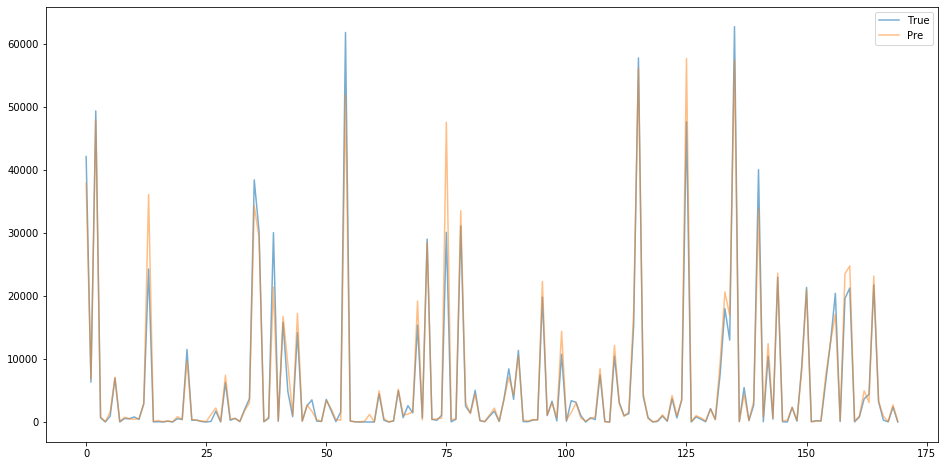

In [898]:
fig1=plt.figure(figsize=(16,8))
plt.plot(range(len(y_test)),y_test,alpha=0.6,label='True')
plt.plot(range(len(y_test)),lry_pred,alpha=0.5,label='Pre')
plt.legend()

In [774]:
import xgboost as xgb

In [775]:
def drawimportance(feature_impor,cols):
    fi=pd.DataFrame(feature_impor,index=cols,columns=['gain score'])
    fi_ordered=fi.sort_values(by='gain score', ascending=False)

    fig=plt.figure(figsize=(20,10))
    ax=fig.add_subplot(111)

    ax.bar(fi_ordered.index,fi_ordered['gain score'])
    ax.set_ylabel('Gain Score',fontsize=20)
    ax.set_xlabel('Features',fontsize=20)
    xlabels = ax.get_xticklabels()
    ax.set_xticklabels(xlabels,rotation=90,fontsize=10)

    axt=ax.twinx()
    p_n = 1.0*fi_ordered.cumsum()/fi_ordered.sum()
    axt.plot(p_n.index,p_n['gain score'],'-or')
    axt.set_ylabel('Accumulated Percentage',fontsize=20)
    return fi_ordered

In [776]:
def minmaxtrans(x,y):
    for c in x.columns:
        if c in scol:
            tarc=x[c]
            c_max=tarc.max()
            c_min=tarc.min()
            x[c]=(x[c]-tarc.min())/(tarc.max()-tarc.min())
            
    tp=[]
    y_max=y.max()
    tp.append(y_max)
    y_min=y.min()
    tp.append(y_min)
    y_s=(y-y.min())/(y.max()-y.min())
    y_s=y_s.values
    return x,y_s,tp

In [777]:
def inverse_minmax(ytest,xgbpre,tp):
    gap=tp[0]-tp[1]
    ytest=ytest*gap+tp[1]
    xgbpre=xgbpre*gap+tp[1]
    #npre=npre*gap+tp[1]
    return ytest,xgbpre#,npre

In [778]:
def model_xgb(bstr, tset, xcols, param,flag):
    X,y,traincols=trainingset(tset,xcols,flag)
    #X_s,y_s,transplan=minmaxtrans(X,y)
    #print(X_s)
    #print(y_s)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.05,
                                                    #stratify=patients_outcome['In-hospital_death'],
                                                    random_state=1)
    dtrain = xgb.DMatrix(X_train, label=y_train)
    xtest = xgb.DMatrix(X_test)
    result = xgb.cv(param, dtrain, num_round, num_fold)
    print(result)
    bstr.fit(X_train,y_train)
    xgb_pre=bstr.predict(X_test)
    out=wmape(y_test,xgb_pre)
    print('wmape is ',out)
    feature_i=bstr.feature_importances_
    fo=drawimportance(feature_i,traincols)
    nextset=tset.copy()
    print(len(X))
    nextpre=bstr.predict(X)
    print(len(nextpre))
    #y_test,xgb_pre=inverse_minmax(y_test,xgb_pre,transplan)
    #nextset['bstout']=nextpre
    return fo,y_test,xgb_pre,nextpre

In [779]:
param = { 'eta': 0.4, 'silent': 1, 'objective':'reg:linear'}
#eta shrinks the feature weights to make the boosting process more conservative.
# the larger gamma is, the more conservative the model is
param['gama']=0
param['min_child_weight']=1

#Increasing this value will make the model more complex and more likely to overfit
param['max_depth']=6

param['seed'] = 100
param['eval_metric'] = ['mae']
#param['scale_pos_weight']=5
# try to avoid overfitting
param['colsample_bytree']=1
param['subsample']=0.80
# the larger gamma is, the more conservative the model is
param['max_delta_step']=0
param['lambda']=500
param['alpha']=10

num_round=60
num_fold=5

In [780]:
bstr = xgb.XGBRegressor(**param)

In [781]:
#reducedset=totalsetdroped[totalsetdroped['Year']>=2017]

    train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0      5763.780762      87.622918    5775.872363    437.098899
1      4794.089160     100.546994    4820.487988    357.468687
2      4200.846143      63.711730    4242.642676    332.893230
3      3806.395459      63.129132    3861.535889    317.841919
4      3520.518018      62.441134    3599.363281    300.438853
5      3267.096582      58.961591    3355.444970    275.751262
6      3068.452051      43.942942    3161.762842    277.186307
7      2894.966211      45.644108    3011.693408    257.101889
8      2754.324951      42.715004    2874.109570    249.495384
9      2629.491846      39.862634    2757.951953    244.000135
10     2516.696191      36.067751    2656.678516    247.421582
11     2421.918506      37.531776    2576.126172    243.654892
12     2336.428516      39.168501    2500.971484    241.599510
13     2259.443897      40.478254    2434.587939    245.088963
14     2189.992188      41.958236    2379.521972    245

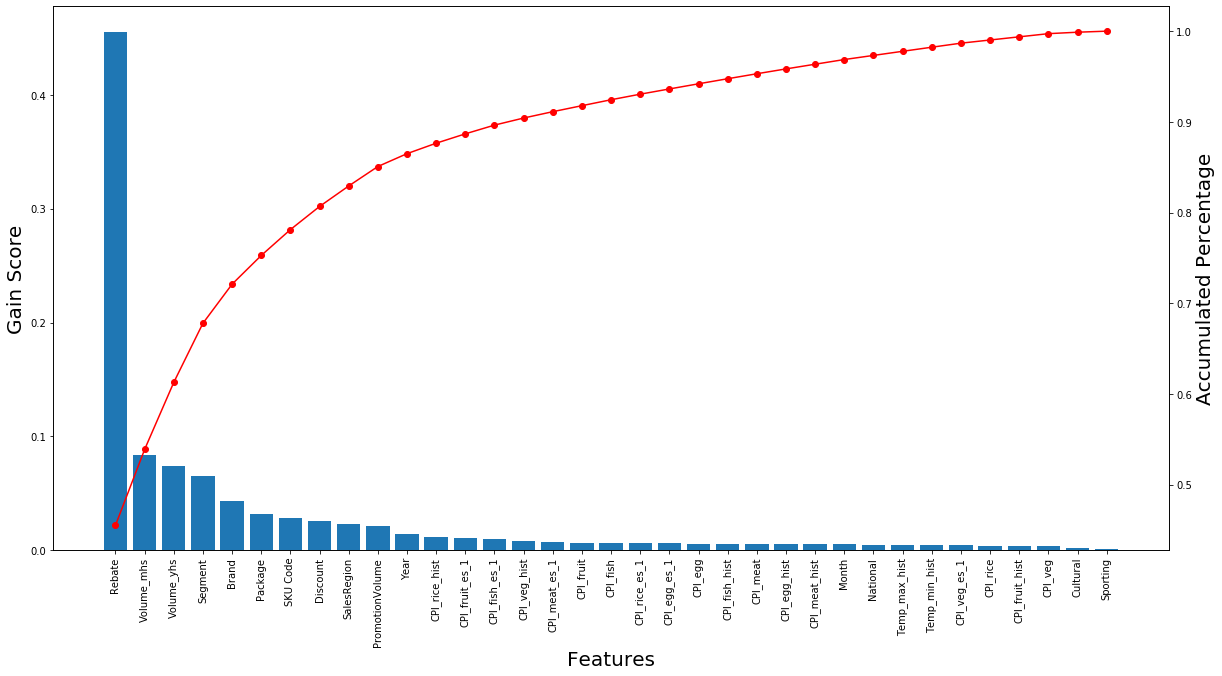

In [782]:
featureis,y_true,y_pre,nextpre1=model_xgb(bstr, totalsetdroped, xcols, param, 0)

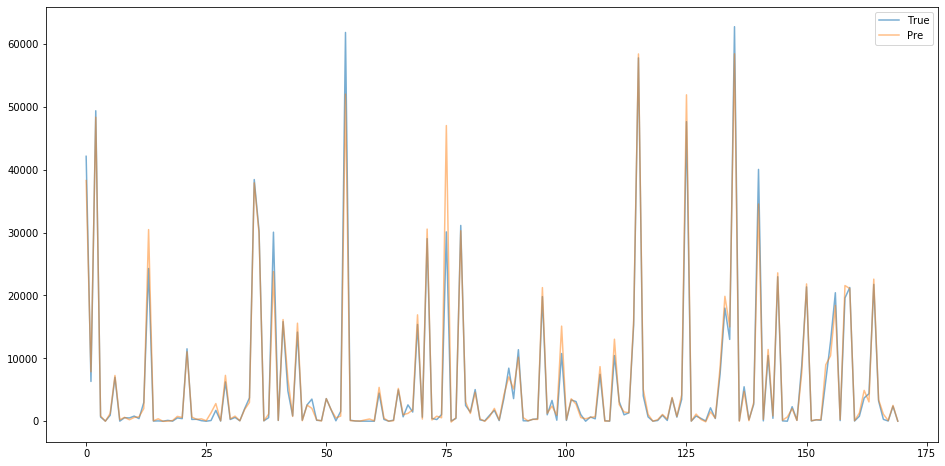

In [783]:
fig1=plt.figure(figsize=(16,8))
plt.plot(range(len(y_true)),y_true,alpha=0.6,label='True')
plt.plot(range(len(y_pre)),y_pre,alpha=0.5,label='Pre')
plt.legend()

In [784]:
colsfilter2=featureis.index[6:].to_list()
colsfilter2

['SKU Code',
 'Discount',
 'SalesRegion',
 'PromotionVolume',
 'Year',
 'CPI_rice_hist',
 'CPI_fruit_es_1',
 'CPI_fish_es_1',
 'CPI_veg_hist',
 'CPI_meat_es_1',
 'CPI_fruit',
 'CPI_fish',
 'CPI_rice_es_1',
 'CPI_egg_es_1',
 'CPI_egg',
 'CPI_fish_hist',
 'CPI_meat',
 'CPI_egg_hist',
 'CPI_meat_hist',
 'Month',
 'National',
 'Temp_max_hist',
 'Temp_min_hist',
 'CPI_veg_es_1',
 'CPI_rice',
 'CPI_fruit_hist',
 'CPI_veg',
 'Cultural',
 'Sporting']

In [785]:
param1 = { 'eta': 0.1, 'silent': 1, 'objective':'reg:linear'}
#eta shrinks the feature weights to make the boosting process more conservative.
# the larger gamma is, the more conservative the model is
param1['gama']=0
param1['min_child_weight']=1

#Increasing this value will make the model more complex and more likely to overfit
param1['max_depth']=6


param1['seed'] = 100
param1['eval_metric'] = ['mae']
#param1['scale_pos_weight']=5
# try to avoid overfitting
param1['colsample_bytree']=1
param1['subsample']=0.8
# the larger gamma is, the more conservative the model is
param1['max_delta_step']=0
param1['lambda']=1
param1['alpha']=1

num_round=60
num_fold=5

    train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0      6423.780566     111.143381    6424.270215    471.424629
1      5834.271191     101.993290    5837.690527    428.770268
2      5308.633301      92.968536    5324.758301    397.430105
3      4846.377246      81.371612    4869.096289    359.256437
4      4435.047754      69.860440    4467.498926    335.230907
5      4067.294824      65.004205    4109.255713    308.687499
6      3738.368994      55.932265    3800.637598    291.256511
7      3443.180713      53.760340    3522.117090    260.932776
8      3182.268310      48.881602    3277.443164    243.140223
9      2943.451367      46.447401    3059.540283    215.744615
10     2737.451318      42.067068    2876.542090    198.248998
11     2554.303174      37.984745    2715.811719    183.788949
12     2391.253662      39.293820    2578.084424    167.339964
13     2246.109765      37.850765    2467.769482    152.608941
14     2118.132764      36.487766    2369.128369    141

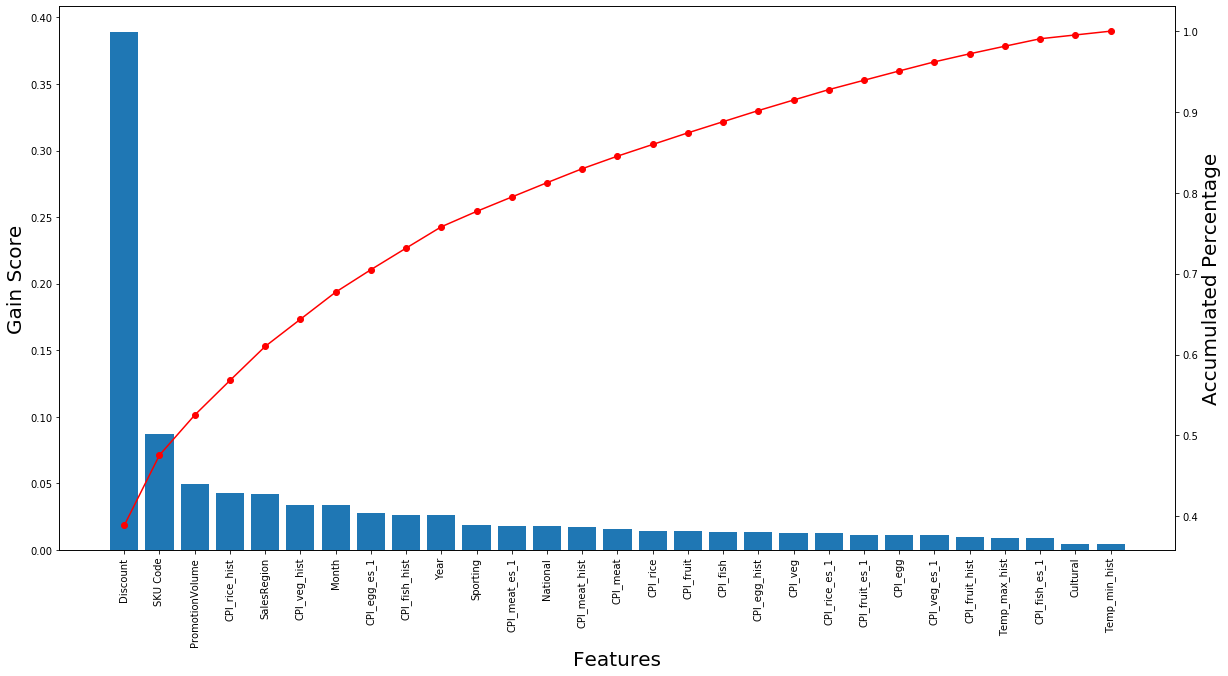

In [786]:
featureis1,y_true1,y_pre1,nextpre11=model_xgb(bstr,totalsetdroped, colsfilter2, param1,1)

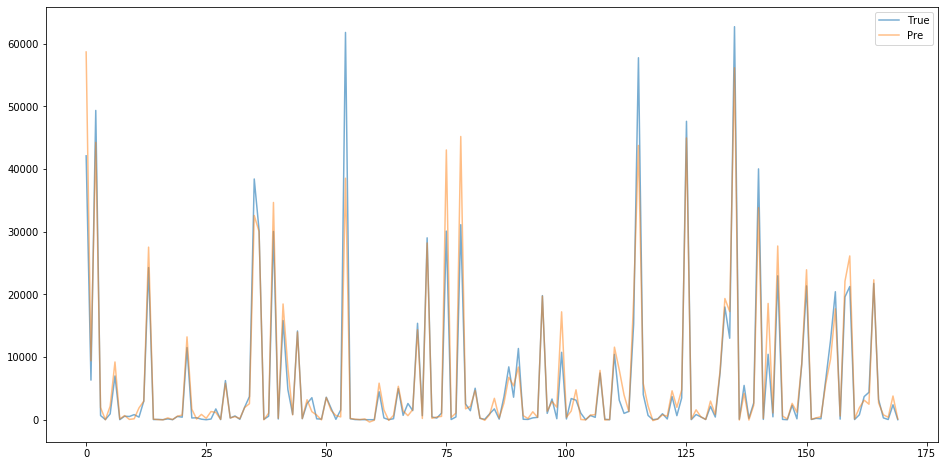

In [787]:
fig1=plt.figure(figsize=(16,8))
plt.plot(range(len(y_true1)),y_true1,alpha=0.6,label='True')
plt.plot(range(len(y_pre1)),y_pre1,alpha=0.5,label='Pre')
plt.legend()

In [744]:
# 最后优化数值特征的取值情况，如minmaxscalar, 取对数等操作

In [745]:
# 注意往期数据的多样化处理// 例如按月合并时可以在月平均的基础上继续纳入：
# 月度最大值
# 月度标准差等 （取值区间可以设置为去年同期数据）

In [788]:
# 新特征引入实践

# 模型ensembling 实践
# 年度销售额整体下降3.6% 复式简单计算方法
totalsetdroped

,Year,Month,SalesRegion,SKU Code,VolumeHL,National,Cultural,Sporting,CPI_rice,CPI_meat,...,CPI_veg_es_1,CPI_fruit_es_1,Brand,Package,Segment,Rebate,PromotionVolume,Discount,Volume_yhs,Volume_mhs
0,2016,1,1,1,60468.0,3,2,1,1.5,17.1,...,5.098857,0.691192,1,1,1,315557.0,0.0,15270111.0,36708.583333,59869.306931
1,2016,1,1,4,2965.0,3,2,1,1.5,17.1,...,5.098857,0.691192,1,3,1,12866.0,0.0,761783.0,1520.996732,2878.640777
2,2016,1,1,9,4882.0,3,2,1,1.5,17.1,...,5.098857,0.691192,2,1,2,27540.0,0.0,139546.0,2655.198020,4786.274510
3,2016,1,1,11,350.0,3,2,1,1.5,17.1,...,5.098857,0.691192,2,3,2,47233.0,0.0,47233.0,356.454248,353.535354
4,2016,1,1,13,4041.0,3,2,1,1.5,17.1,...,5.098857,0.691192,4,3,3,19195.0,0.0,509244.0,1353.022876,3923.300971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4131,2019,11,2,69,4880.0,0,2,0,0.3,79.7,...,0.040130,9.069401,9,1,3,59236.0,0.0,515757.0,651.028333,1331.960000
4132,2019,11,2,62,6569.0,0,2,0,0.3,79.7,...,0.040130,9.069401,9,1,3,34354.0,43402.0,465100.0,1799.195833,3736.960000
4133,2019,11,2,63,5768.0,0,2,0,0.3,79.7,...,0.040130,9.069401,9,1,3,34673.0,34488.0,145137.0,375.239167,634.800000
4134,2019,11,2,45,0.0,0,2,0,0.3,79.7,...,0.040130,9.069401,4,2,3,1951.0,0.0,23031.0,20.308333,5.000000


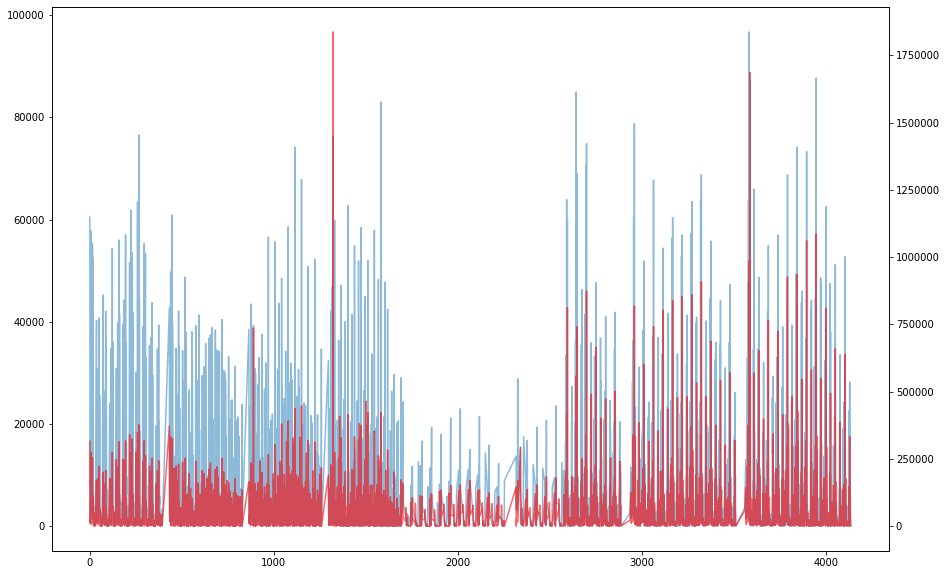

In [789]:
fig=plt.figure(figsize=(15,10))
totalsetdroped['VolumeHL'].plot(alpha=0.5)

ax=plt.twinx()
totalsetdroped['Rebate'].plot(alpha=0.6,ax=ax,color='red')

In [790]:
import lightgbm as lgbm

In [879]:
def model_train(model, tset, xcols,p,flag):
    X,y,traincols=trainingset(tset,xcols,flag)
    #X_s,y_s,transplan=minmaxtrans(X,y)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1,random_state=2)
                                                    #stratify=patients_outcome['In-hospital_death'],
#                                                     
    dtrain = lgbm.Dataset(X_train, label=y_train)
    xtest = lgbm.Dataset(X_test)
    result = lgbm.cv(p, dtrain,num_boost_round=680,nfold=5,verbose_eval=1,eval_train_metric=True,stratified=False)
    print(result)
    #train_data=lgbm.Dataset(X_train,y_train)
    #test_data=lgbm.Dataset(X_test,y_test)
    model .fit(X_train,y_train)
               #valid_sets=test_data,
               #num_boost_round=5000,
               #early_stopping_rounds=100)
    pre=model.predict(X_test)
    out=wmape(y_test,pre)
    print('wmape is ',out)
    feature_i=model.feature_importances_
    fo=drawimportance(feature_i,traincols)
    nextset=tset.copy()
    nextpre=model.predict(X)
    #y_test,pre=inverse_minmax(y_test,pre,transplan)
    #nextset['lgbmout']=nextpre
    return fo,y_test,pre,nextpre

In [880]:
parameters = {
    'application': 'regression',
    'objective': 'regression',
    'metric': 'mape',
    'is_unbalance': 'false',
    'boosting': 'gbdt',
    'num_leaves': 10,
#     'feature_fraction': 0.95,
#     'bagging_fraction': 0.95,
#     'bagging_freq': 20,
    'learning_rate': 0.2,
    'verbose': 0,
    'max_depth':10
}

In [881]:
lgbmm=lgbm.LGBMRegressor(**parameters)

In [928]:
nextgs1=totalsetdroped.copy()
nextgs1['xgb1']=nextpre1
nextgs1['xgb2']=tpre
#nextgs1['xgb3']=nextpre22
nextgs1=nextgs1[nextgs1['VolumeHL']<=30000]

[1]	cv_agg's train mape: 158.659 + 2.54038	cv_agg's valid mape: 158.694 + 10.8933
[2]	cv_agg's train mape: 129.835 + 2.25999	cv_agg's valid mape: 129.922 + 8.44804
[3]	cv_agg's train mape: 106.029 + 1.44559	cv_agg's valid mape: 106.223 + 6.88238
[4]	cv_agg's train mape: 86.6806 + 1.49991	cv_agg's valid mape: 86.8191 + 5.1958
[5]	cv_agg's train mape: 71.1326 + 0.995307	cv_agg's valid mape: 71.4027 + 4.28178
[6]	cv_agg's train mape: 58.2942 + 0.964527	cv_agg's valid mape: 58.617 + 3.25665
[7]	cv_agg's train mape: 48.1803 + 0.656719	cv_agg's valid mape: 48.4454 + 2.55215
[8]	cv_agg's train mape: 39.7952 + 0.695027	cv_agg's valid mape: 39.9849 + 1.97562
[9]	cv_agg's train mape: 33.178 + 0.768592	cv_agg's valid mape: 33.3713 + 1.41279
[10]	cv_agg's train mape: 28.0058 + 0.504245	cv_agg's valid mape: 28.2412 + 1.44599
[11]	cv_agg's train mape: 23.9458 + 0.653072	cv_agg's valid mape: 24.209 + 1.18344
[12]	cv_agg's train mape: 20.8283 + 0.65282	cv_agg's valid mape: 21.0614 + 1.12696
[13]	cv_ag

[116]	cv_agg's train mape: 3.03651 + 0.260453	cv_agg's valid mape: 4.2307 + 1.80146
[117]	cv_agg's train mape: 3.05057 + 0.266237	cv_agg's valid mape: 4.24547 + 1.76849
[118]	cv_agg's train mape: 3.04008 + 0.255217	cv_agg's valid mape: 4.22895 + 1.77465
[119]	cv_agg's train mape: 3.03754 + 0.242005	cv_agg's valid mape: 4.22913 + 1.78016
[120]	cv_agg's train mape: 3.02035 + 0.241315	cv_agg's valid mape: 4.22646 + 1.77395
[121]	cv_agg's train mape: 2.9868 + 0.234222	cv_agg's valid mape: 4.18311 + 1.7748
[122]	cv_agg's train mape: 2.99018 + 0.227362	cv_agg's valid mape: 4.19203 + 1.77565
[123]	cv_agg's train mape: 2.97111 + 0.240172	cv_agg's valid mape: 4.18247 + 1.7795
[124]	cv_agg's train mape: 2.97264 + 0.234571	cv_agg's valid mape: 4.17629 + 1.77433
[125]	cv_agg's train mape: 2.98185 + 0.253224	cv_agg's valid mape: 4.19146 + 1.75472
[126]	cv_agg's train mape: 2.96363 + 0.239811	cv_agg's valid mape: 4.1782 + 1.75357
[127]	cv_agg's train mape: 2.96218 + 0.244898	cv_agg's valid mape: 4.1

[247]	cv_agg's train mape: 2.19809 + 0.164889	cv_agg's valid mape: 4.04962 + 1.40937
[248]	cv_agg's train mape: 2.1948 + 0.166423	cv_agg's valid mape: 4.04746 + 1.40807
[249]	cv_agg's train mape: 2.18913 + 0.160413	cv_agg's valid mape: 4.04858 + 1.40799
[250]	cv_agg's train mape: 2.19089 + 0.165887	cv_agg's valid mape: 4.05646 + 1.41327
[251]	cv_agg's train mape: 2.18474 + 0.170588	cv_agg's valid mape: 4.04754 + 1.41503
[252]	cv_agg's train mape: 2.18845 + 0.169269	cv_agg's valid mape: 4.03439 + 1.39278
[253]	cv_agg's train mape: 2.17676 + 0.167941	cv_agg's valid mape: 4.02397 + 1.3959
[254]	cv_agg's train mape: 2.17662 + 0.169006	cv_agg's valid mape: 4.02508 + 1.39517
[255]	cv_agg's train mape: 2.18342 + 0.166753	cv_agg's valid mape: 4.03219 + 1.39695
[256]	cv_agg's train mape: 2.17257 + 0.174434	cv_agg's valid mape: 4.03057 + 1.39859
[257]	cv_agg's train mape: 2.17108 + 0.176433	cv_agg's valid mape: 4.03044 + 1.39983
[258]	cv_agg's train mape: 2.16634 + 0.174503	cv_agg's valid mape: 

[381]	cv_agg's train mape: 1.75271 + 0.113544	cv_agg's valid mape: 3.91819 + 1.29475
[382]	cv_agg's train mape: 1.75253 + 0.11184	cv_agg's valid mape: 3.9127 + 1.29918
[383]	cv_agg's train mape: 1.74526 + 0.110013	cv_agg's valid mape: 3.89907 + 1.29418
[384]	cv_agg's train mape: 1.74211 + 0.114053	cv_agg's valid mape: 3.89166 + 1.28943
[385]	cv_agg's train mape: 1.73736 + 0.119137	cv_agg's valid mape: 3.88748 + 1.27952
[386]	cv_agg's train mape: 1.73848 + 0.118036	cv_agg's valid mape: 3.88491 + 1.28026
[387]	cv_agg's train mape: 1.73367 + 0.115713	cv_agg's valid mape: 3.88559 + 1.28438
[388]	cv_agg's train mape: 1.73114 + 0.117112	cv_agg's valid mape: 3.87998 + 1.27626
[389]	cv_agg's train mape: 1.728 + 0.114439	cv_agg's valid mape: 3.87068 + 1.27353
[390]	cv_agg's train mape: 1.73095 + 0.116555	cv_agg's valid mape: 3.88369 + 1.27643
[391]	cv_agg's train mape: 1.7289 + 0.118495	cv_agg's valid mape: 3.88566 + 1.28061
[392]	cv_agg's train mape: 1.72884 + 0.116891	cv_agg's valid mape: 3.8

[494]	cv_agg's train mape: 1.42807 + 0.0854262	cv_agg's valid mape: 3.92801 + 1.2913
[495]	cv_agg's train mape: 1.42693 + 0.0854344	cv_agg's valid mape: 3.92719 + 1.29121
[496]	cv_agg's train mape: 1.42564 + 0.0865866	cv_agg's valid mape: 3.92436 + 1.28831
[497]	cv_agg's train mape: 1.42271 + 0.0885145	cv_agg's valid mape: 3.92063 + 1.29132
[498]	cv_agg's train mape: 1.42231 + 0.0851292	cv_agg's valid mape: 3.92156 + 1.29172
[499]	cv_agg's train mape: 1.42066 + 0.0834409	cv_agg's valid mape: 3.92426 + 1.29368
[500]	cv_agg's train mape: 1.41981 + 0.0839633	cv_agg's valid mape: 3.92368 + 1.29115
[501]	cv_agg's train mape: 1.41879 + 0.0779336	cv_agg's valid mape: 3.92545 + 1.2935
[502]	cv_agg's train mape: 1.41228 + 0.078844	cv_agg's valid mape: 3.92195 + 1.28996
[503]	cv_agg's train mape: 1.41385 + 0.080806	cv_agg's valid mape: 3.92802 + 1.29161
[504]	cv_agg's train mape: 1.41425 + 0.0820633	cv_agg's valid mape: 3.92307 + 1.28825
[505]	cv_agg's train mape: 1.41034 + 0.0809876	cv_agg's va

[634]	cv_agg's train mape: 1.15175 + 0.0552434	cv_agg's valid mape: 3.92184 + 1.30388
[635]	cv_agg's train mape: 1.14223 + 0.0557999	cv_agg's valid mape: 3.9179 + 1.31663
[636]	cv_agg's train mape: 1.14075 + 0.054229	cv_agg's valid mape: 3.91451 + 1.31595
[637]	cv_agg's train mape: 1.13772 + 0.0542909	cv_agg's valid mape: 3.91284 + 1.30344
[638]	cv_agg's train mape: 1.13771 + 0.0553967	cv_agg's valid mape: 3.91024 + 1.30743
[639]	cv_agg's train mape: 1.1351 + 0.0561175	cv_agg's valid mape: 3.91174 + 1.30614
[640]	cv_agg's train mape: 1.1341 + 0.0534521	cv_agg's valid mape: 3.90673 + 1.30566
[641]	cv_agg's train mape: 1.12857 + 0.0544466	cv_agg's valid mape: 3.9092 + 1.30509
[642]	cv_agg's train mape: 1.12606 + 0.0556889	cv_agg's valid mape: 3.90745 + 1.30365
[643]	cv_agg's train mape: 1.12832 + 0.055836	cv_agg's valid mape: 3.90508 + 1.30528
[644]	cv_agg's train mape: 1.12795 + 0.0556938	cv_agg's valid mape: 3.90402 + 1.30577
[645]	cv_agg's train mape: 1.12894 + 0.0559258	cv_agg's vali

wmape is  0.08460343536740865


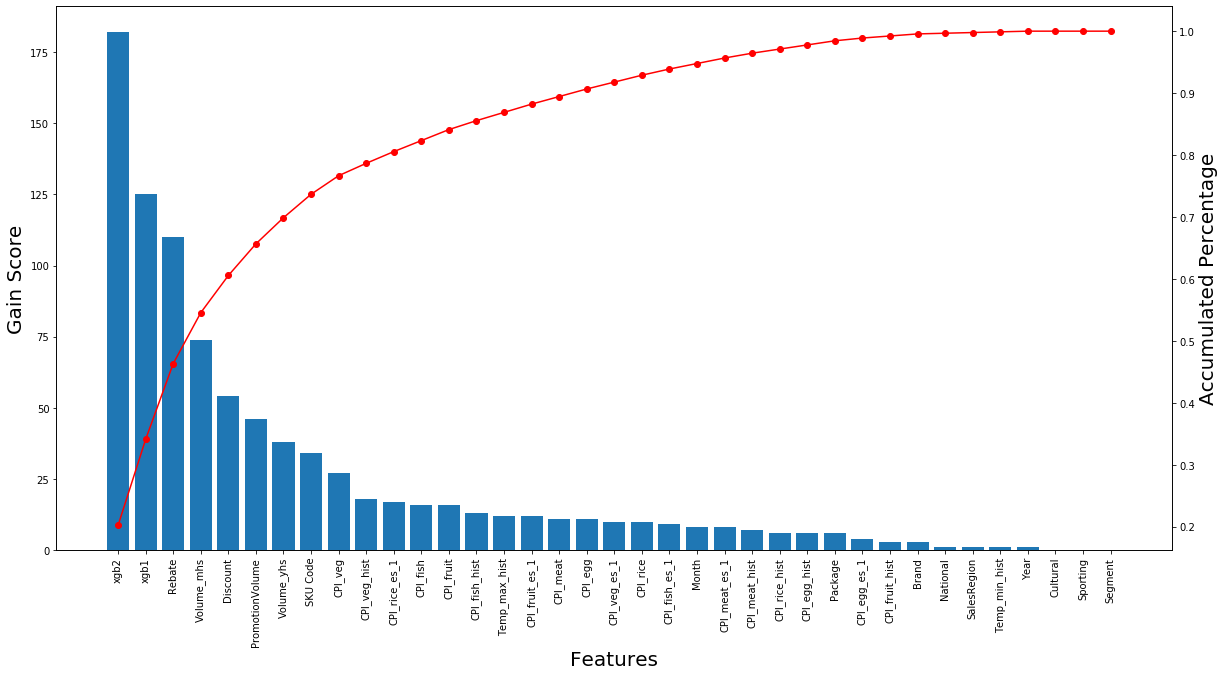

In [929]:
fio2,ytest2,pre2,nextpre2=model_train(lgbmm,nextgs1,xcols,parameters, 0)

In [930]:
def createdraw(ytest,pre):
    fig1=plt.figure(figsize=(16,8))
    plt.plot(range(len(ytest)),ytest,alpha=0.6,label='True')
    plt.plot(range(len(pre)),pre,alpha=0.5,label='Pre')
    plt.legend()

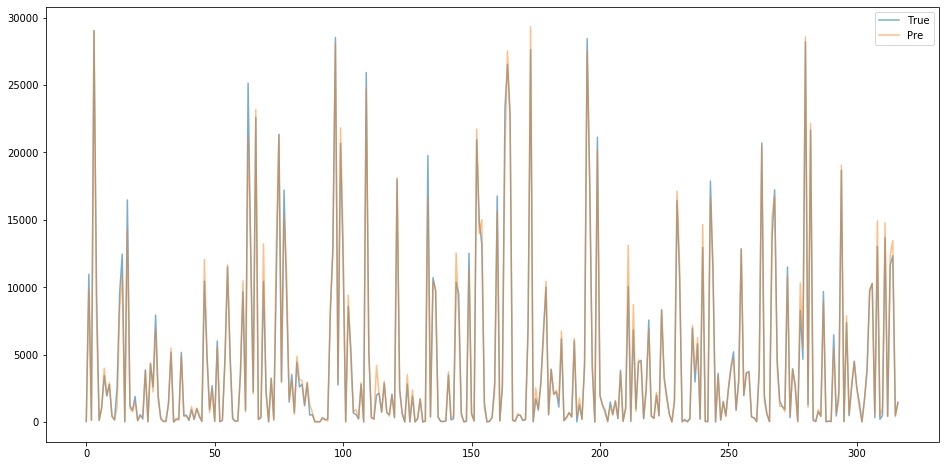

In [931]:
createdraw(ytest2,pre2)

[1]	cv_agg's train mape: 250.404 + 12.8654	cv_agg's valid mape: 251.22 + 45.8058
[2]	cv_agg's train mape: 212.304 + 10.2721	cv_agg's valid mape: 214.067 + 42.8754
[3]	cv_agg's train mape: 181.038 + 8.11849	cv_agg's valid mape: 183.035 + 40.0622
[4]	cv_agg's train mape: 155.102 + 7.00361	cv_agg's valid mape: 157.075 + 36.7112
[5]	cv_agg's train mape: 133.937 + 5.96731	cv_agg's valid mape: 135.637 + 33.6203
[6]	cv_agg's train mape: 114.898 + 5.4204	cv_agg's valid mape: 117.105 + 30.9936
[7]	cv_agg's train mape: 100.377 + 6.55415	cv_agg's valid mape: 102.335 + 26.7871
[8]	cv_agg's train mape: 88.7931 + 6.88031	cv_agg's valid mape: 90.5915 + 24.6468
[9]	cv_agg's train mape: 79.1411 + 6.47669	cv_agg's valid mape: 81.1315 + 23.4546
[10]	cv_agg's train mape: 69.7045 + 5.87458	cv_agg's valid mape: 72.6973 + 23.3296
[11]	cv_agg's train mape: 61.7089 + 4.503	cv_agg's valid mape: 65.1287 + 23.5895
[12]	cv_agg's train mape: 55.3209 + 4.02283	cv_agg's valid mape: 58.5514 + 22.9065
[13]	cv_agg's tra

[127]	cv_agg's train mape: 11.1446 + 1.58061	cv_agg's valid mape: 15.6763 + 9.03554
[128]	cv_agg's train mape: 11.1173 + 1.5475	cv_agg's valid mape: 15.6085 + 9.00687
[129]	cv_agg's train mape: 11.087 + 1.6063	cv_agg's valid mape: 15.6439 + 9.05628
[130]	cv_agg's train mape: 11.0987 + 1.6054	cv_agg's valid mape: 15.7412 + 9.05855
[131]	cv_agg's train mape: 11.0821 + 1.5896	cv_agg's valid mape: 15.7962 + 9.05566
[132]	cv_agg's train mape: 11.1051 + 1.60829	cv_agg's valid mape: 15.8362 + 8.99641
[133]	cv_agg's train mape: 11.0953 + 1.60208	cv_agg's valid mape: 15.7295 + 8.98491
[134]	cv_agg's train mape: 11.028 + 1.55928	cv_agg's valid mape: 15.7489 + 8.96334
[135]	cv_agg's train mape: 11.0676 + 1.55684	cv_agg's valid mape: 15.7654 + 8.99026
[136]	cv_agg's train mape: 11.0993 + 1.57054	cv_agg's valid mape: 15.8329 + 8.94787
[137]	cv_agg's train mape: 11.0447 + 1.5572	cv_agg's valid mape: 15.7285 + 8.75323
[138]	cv_agg's train mape: 11.0441 + 1.59333	cv_agg's valid mape: 15.7426 + 8.69586

[269]	cv_agg's train mape: 8.32244 + 0.748696	cv_agg's valid mape: 14.7134 + 9.69525
[270]	cv_agg's train mape: 8.34486 + 0.755854	cv_agg's valid mape: 14.7145 + 9.69516
[271]	cv_agg's train mape: 8.30439 + 0.772959	cv_agg's valid mape: 14.6922 + 9.65648
[272]	cv_agg's train mape: 8.29835 + 0.768399	cv_agg's valid mape: 14.6997 + 9.66597
[273]	cv_agg's train mape: 8.26033 + 0.752441	cv_agg's valid mape: 14.6627 + 9.65202
[274]	cv_agg's train mape: 8.26385 + 0.751855	cv_agg's valid mape: 14.6638 + 9.65513
[275]	cv_agg's train mape: 8.26559 + 0.734919	cv_agg's valid mape: 14.6633 + 9.63637
[276]	cv_agg's train mape: 8.25536 + 0.729004	cv_agg's valid mape: 14.6213 + 9.60543
[277]	cv_agg's train mape: 8.21986 + 0.722673	cv_agg's valid mape: 14.5943 + 9.60489
[278]	cv_agg's train mape: 8.19088 + 0.691723	cv_agg's valid mape: 14.6413 + 9.61257
[279]	cv_agg's train mape: 8.20467 + 0.676612	cv_agg's valid mape: 14.6408 + 9.61772
[280]	cv_agg's train mape: 8.20124 + 0.684275	cv_agg's valid mape

[434]	cv_agg's train mape: 6.59838 + 0.433313	cv_agg's valid mape: 13.8695 + 9.09109
[435]	cv_agg's train mape: 6.57946 + 0.432336	cv_agg's valid mape: 13.8849 + 9.09538
[436]	cv_agg's train mape: 6.56254 + 0.421875	cv_agg's valid mape: 13.8556 + 9.03577
[437]	cv_agg's train mape: 6.54466 + 0.44405	cv_agg's valid mape: 13.8371 + 9.02719
[438]	cv_agg's train mape: 6.53994 + 0.430147	cv_agg's valid mape: 13.8217 + 9.00346
[439]	cv_agg's train mape: 6.54254 + 0.426013	cv_agg's valid mape: 13.8313 + 8.99001
[440]	cv_agg's train mape: 6.50995 + 0.428003	cv_agg's valid mape: 13.8342 + 9.04571
[441]	cv_agg's train mape: 6.49639 + 0.420697	cv_agg's valid mape: 13.8601 + 9.07762
[442]	cv_agg's train mape: 6.4883 + 0.422499	cv_agg's valid mape: 13.8804 + 9.0907
[443]	cv_agg's train mape: 6.46587 + 0.43666	cv_agg's valid mape: 13.8874 + 9.09679
[444]	cv_agg's train mape: 6.46304 + 0.435791	cv_agg's valid mape: 13.8907 + 9.10699
[445]	cv_agg's train mape: 6.43952 + 0.432836	cv_agg's valid mape: 13

[582]	cv_agg's train mape: 5.13458 + 0.359678	cv_agg's valid mape: 13.148 + 8.71068
[583]	cv_agg's train mape: 5.12539 + 0.363892	cv_agg's valid mape: 13.1331 + 8.67052
[584]	cv_agg's train mape: 5.12643 + 0.365654	cv_agg's valid mape: 13.1244 + 8.67069
[585]	cv_agg's train mape: 5.10745 + 0.346335	cv_agg's valid mape: 13.113 + 8.67669
[586]	cv_agg's train mape: 5.0932 + 0.359999	cv_agg's valid mape: 13.1369 + 8.71315
[587]	cv_agg's train mape: 5.09759 + 0.347988	cv_agg's valid mape: 13.1219 + 8.71155
[588]	cv_agg's train mape: 5.09386 + 0.348117	cv_agg's valid mape: 13.1238 + 8.71053
[589]	cv_agg's train mape: 5.07573 + 0.347399	cv_agg's valid mape: 13.1022 + 8.7084
[590]	cv_agg's train mape: 5.0616 + 0.347933	cv_agg's valid mape: 13.0775 + 8.69531
[591]	cv_agg's train mape: 5.06826 + 0.360688	cv_agg's valid mape: 13.0767 + 8.68716
[592]	cv_agg's train mape: 5.05319 + 0.364511	cv_agg's valid mape: 13.0853 + 8.69698
[593]	cv_agg's train mape: 5.0425 + 0.372083	cv_agg's valid mape: 13.0

wmape is  0.18002231199828334


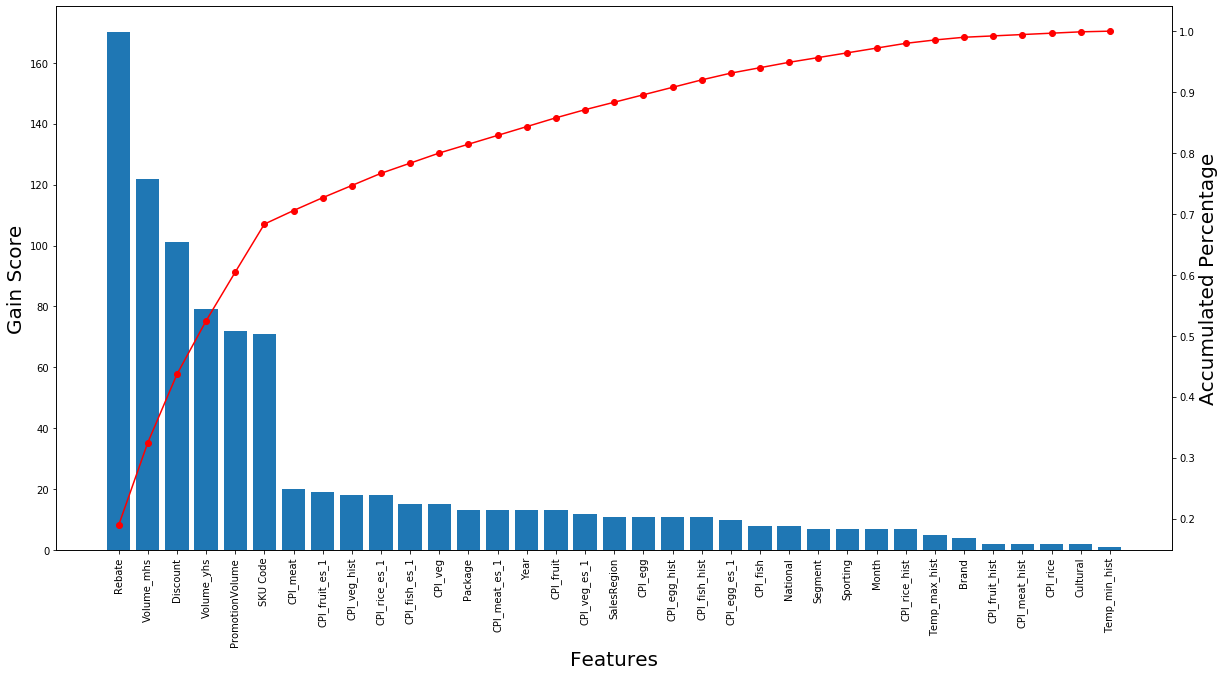

In [849]:
fio22,ytest22,pre22,nextpre22=model_train(lgbmm,totalsetdroped,xcols,parameters, 0)

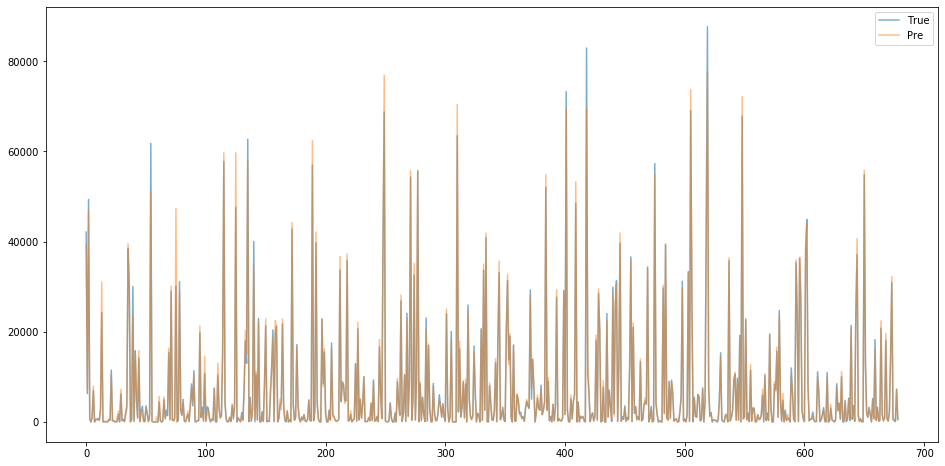

In [850]:
fig1=plt.figure(figsize=(16,8))
plt.plot(range(len(ytest)),ytest,alpha=0.6,label='True')
plt.plot(range(len(pre)),pre,alpha=0.5,label='Pre')
plt.legend()

## 关注离群点sku


In [932]:
pre2

array([1.02453447e+02, 9.85329834e+03, 1.05691664e+02, 2.90430714e+04,
       7.57406022e+03, 1.03936233e+02, 9.83778658e+02, 3.99995229e+03,
       1.99695488e+03, 2.91407635e+03, 3.98382677e+02, 1.38645741e+02,
       1.14521588e+03, 8.41363593e+03, 1.08922967e+04, 5.63061192e+01,
       1.42598038e+04, 9.97755277e+02, 7.66808212e+02, 1.51239686e+03,
       8.24030537e+01, 4.28093188e+02, 4.17184242e+02, 3.80289491e+03,
       2.49248862e+01, 4.38423509e+03, 2.22982879e+03, 6.94298076e+03,
       1.54256285e+03, 2.82819191e+02, 3.22751797e+01, 7.24369668e+01,
       1.20334312e+03, 5.48377044e+03, 1.59774182e+01, 2.96589451e+02,
       1.37200211e+02, 4.87838193e+03, 4.31470978e+02, 4.25154672e+02,
       2.03703063e+02, 1.12929984e+03, 1.95359809e+02, 1.03168046e+03,
       5.66749304e+02, 3.61231554e+01, 1.20652469e+04, 4.92450084e+03,
       7.06454732e+02, 2.42044077e+03, 3.92279417e+01, 5.60010828e+03,
       2.59921693e+01, 1.59407465e+02, 4.51411425e+03, 1.16642990e+04,
      

In [933]:
pre22

array([ 4.40362969e+04,  8.35325062e+03,  5.40651985e+04,  9.93480834e+02,
       -5.93588468e+01,  1.25897106e+03,  6.71722566e+03,  2.05956305e+02,
        7.04147099e+02, -7.67565174e+01,  6.23070448e+02,  8.19859786e+02,
        2.59582763e+03,  3.32467806e+04, -1.21587306e+01,  6.29239056e+02,
       -1.27849646e+02, -9.09654156e+01,  7.96151957e+01,  9.54644473e+02,
        6.33531770e+02,  9.80180137e+03,  1.12306281e+03,  8.18866656e+01,
        3.12928128e+02,  1.75108616e+01,  2.17651353e+03,  2.76687891e+03,
       -1.94930306e+01,  6.91308781e+03,  3.75578169e+02,  6.52912407e+02,
        1.49848179e+02,  2.48499171e+03,  3.15694976e+03,  4.33309891e+04,
        2.70123810e+04,  5.66760193e+01,  1.41588878e+03,  2.00254347e+04,
        1.84920415e+02,  1.43895921e+04,  8.67070468e+03,  1.14446457e+03,
        1.58982735e+04,  2.85795413e+01,  2.48917633e+03,  1.97435248e+03,
        3.29386459e+02, -7.29062297e+01,  3.26666739e+03,  1.53028951e+03,
        2.31402690e+02,  

In [935]:
alphaa=0.95
totalpre=alphaa*pre2+(1-alphaa)*pre22

ValueError: operands could not be broadcast together with shapes (317,) (679,) 

In [869]:
wmape(ytest2,totalpre)

0.08332992339886146